In [1]:
# kinetics 

import pandas 

df = pandas.read_csv( 'clean/kinetics.csv' ) 

print( len( df.mutant.unique() ) ) 
print( df.columns ) 

31
Index(['Unnamed: 0', 'well', 'rate', 'mutant', 'protein_yield', 'dilution',
       'note', 'kobs', 's'],
      dtype='object')


In [2]:
from scipy.optimize import curve_fit
import numpy as np 

def my_curve_fit( f, xdata, ydata, p0 ):
    try:
        params, cov = curve_fit( f, xdata, ydata, p0 )
        return params, cov 
    except:
        return np.zeros( len( p0 ) ).replace( [ 0 ], np.nan )

In [3]:
def v( s, kcat, km ):
    return ( kcat * s ) / ( km + s )

In [4]:
for idx, data in df.groupby( 'mutant' ):
    if len( data ) != 24:
        print( idx, 'ain\'t got no (<24)' )

In [5]:
my_mutants = []
for idx, data in df.groupby( 'mutant' ):
    mutation = idx.split( '_' )[ 0 ] 
    params, cov = my_curve_fit( v, data.s, data.kobs, ( data.kobs.max(), .1 ) )
    my_mutants.append( ( mutation, params, cov ) ) 

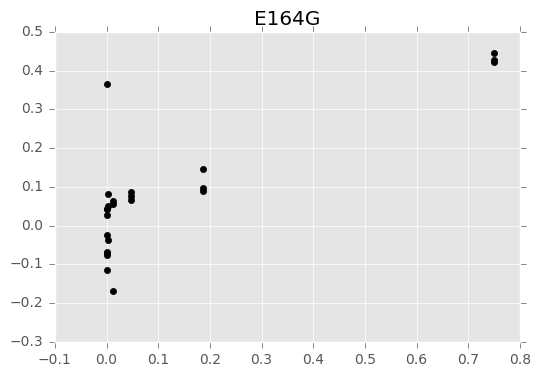

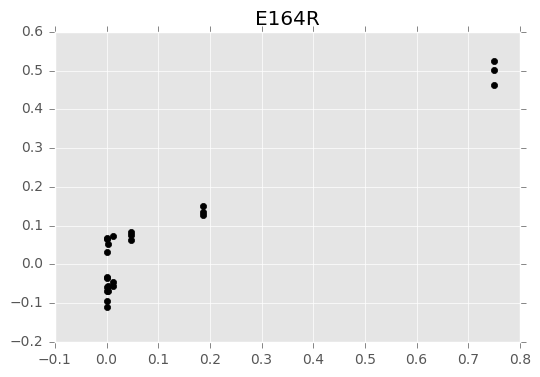

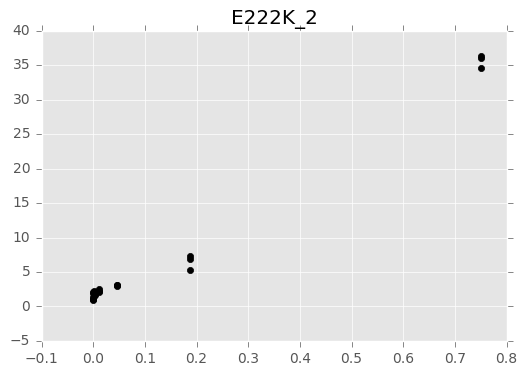

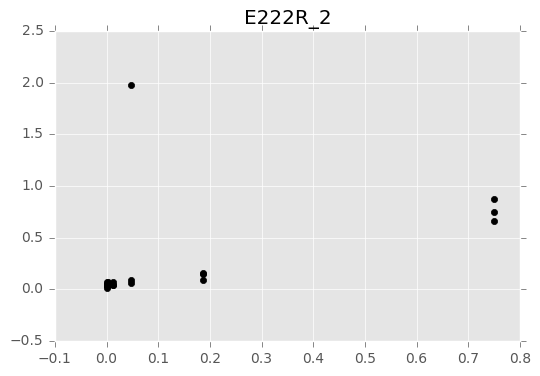

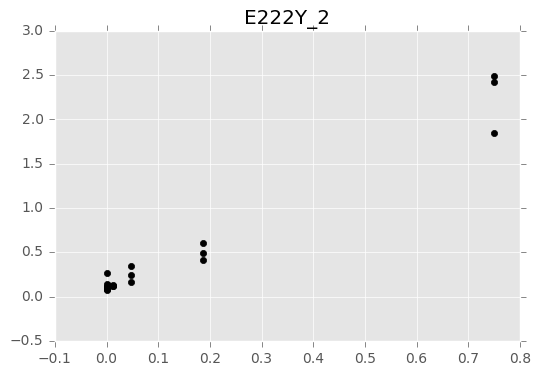

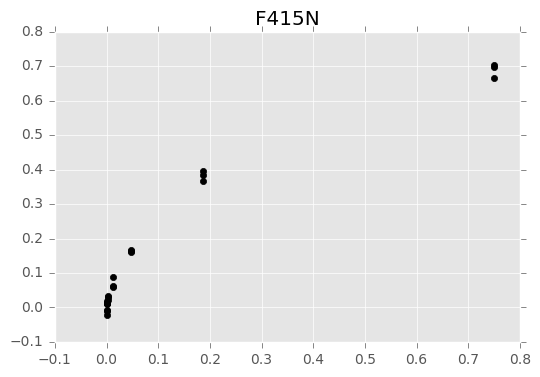

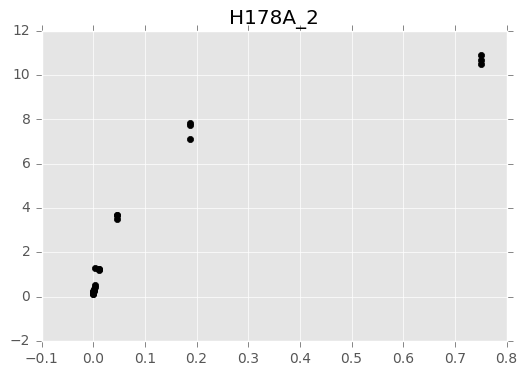

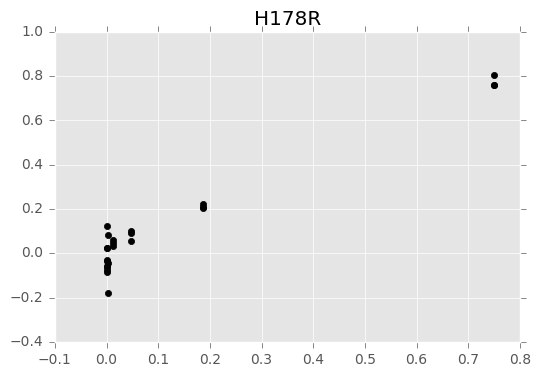

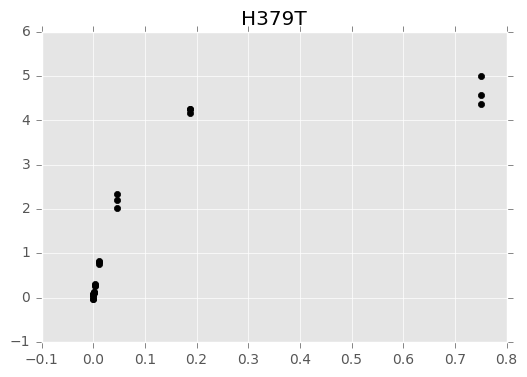

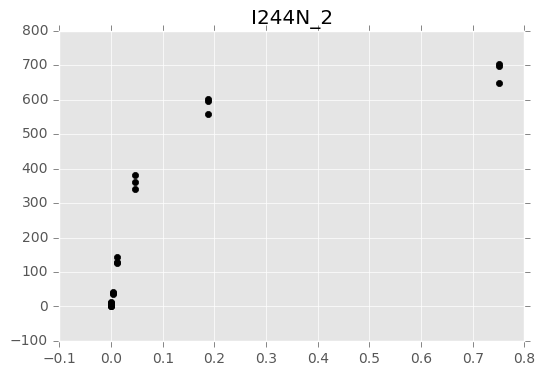

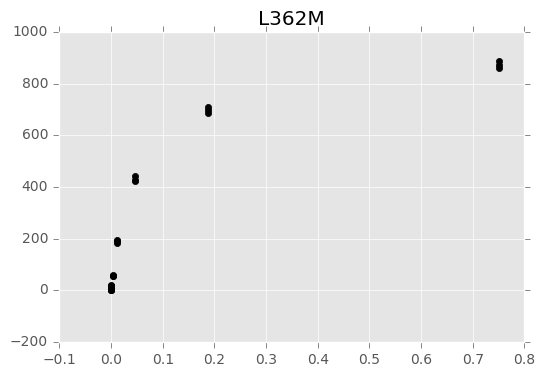

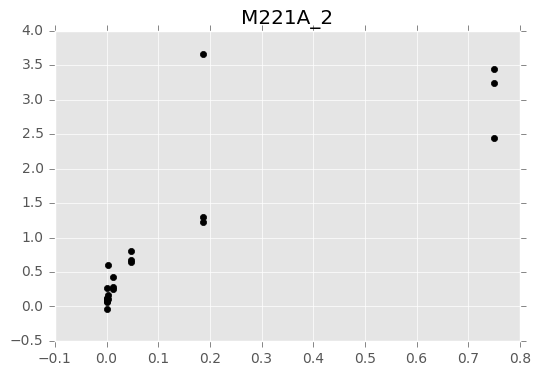

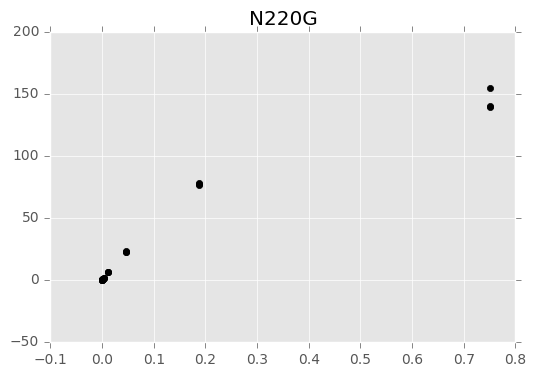

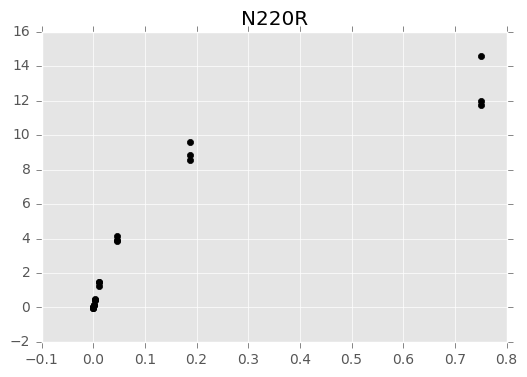

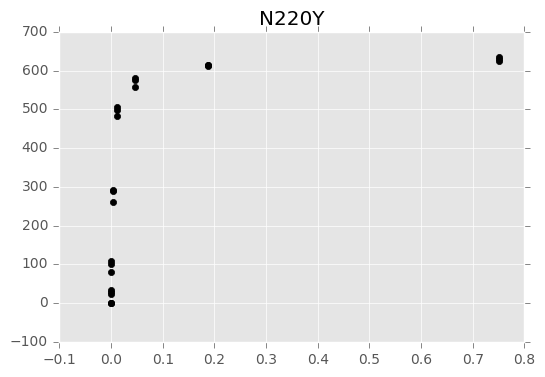

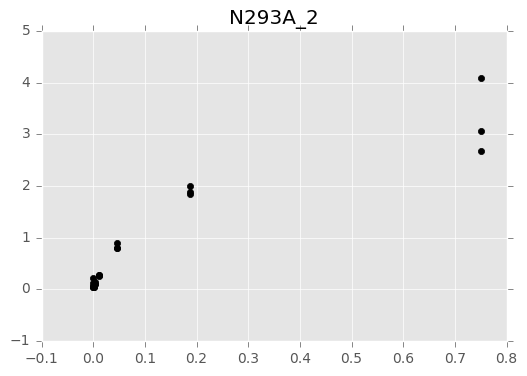

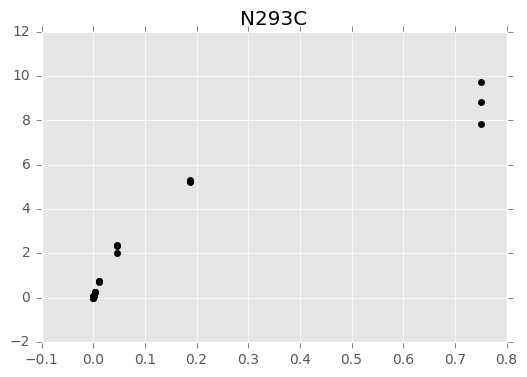

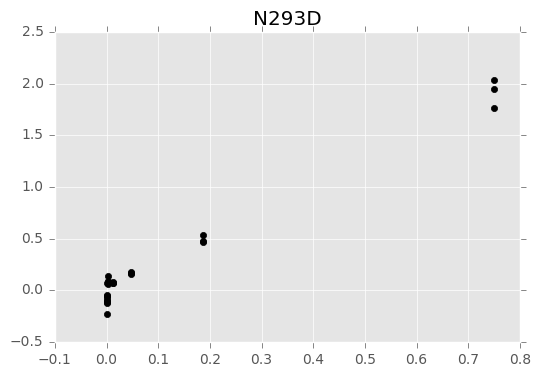

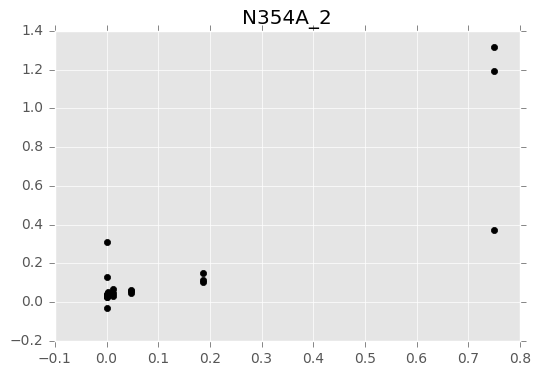

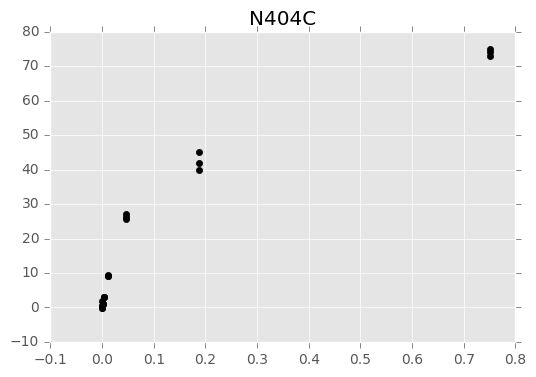

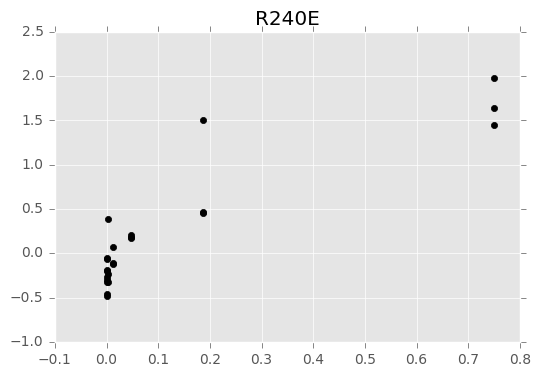

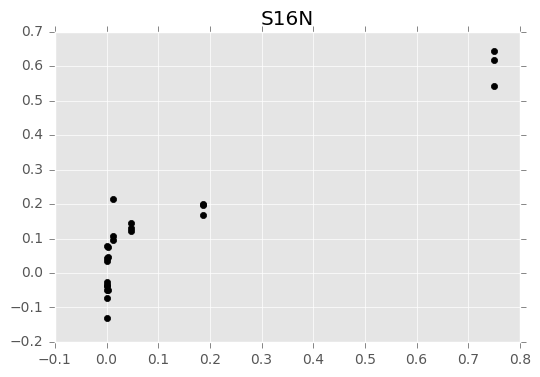

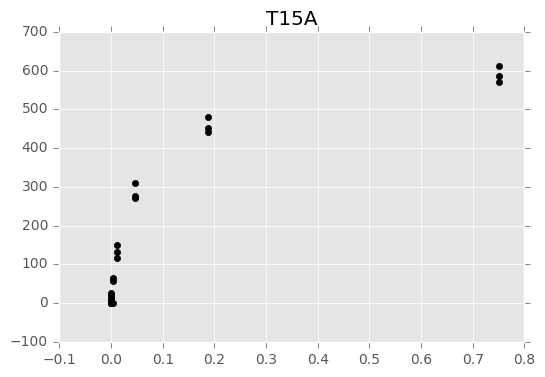

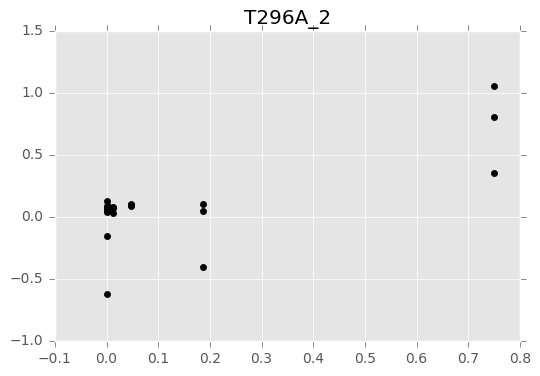

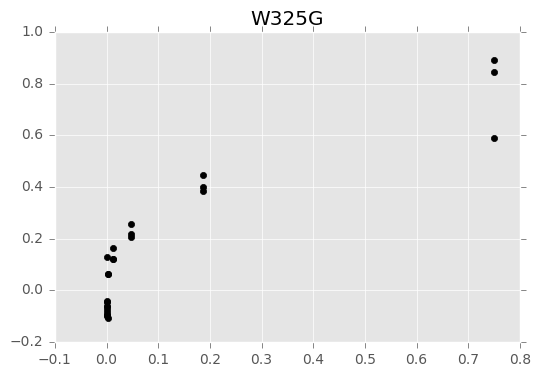

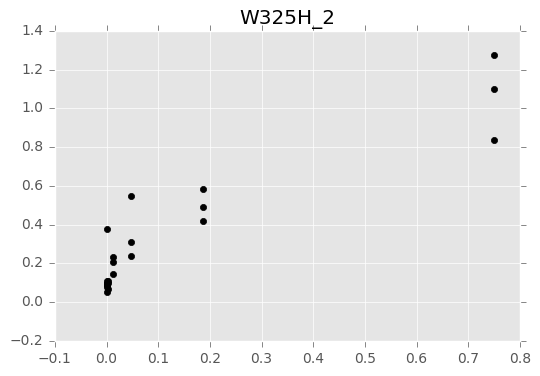

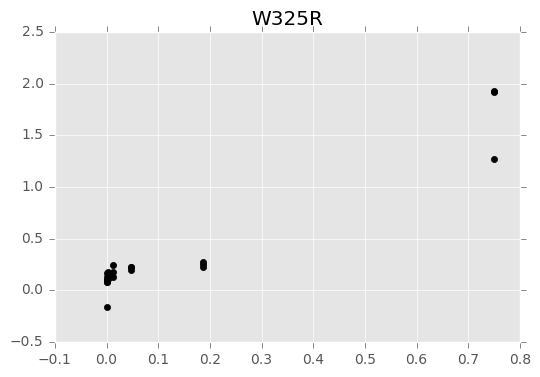

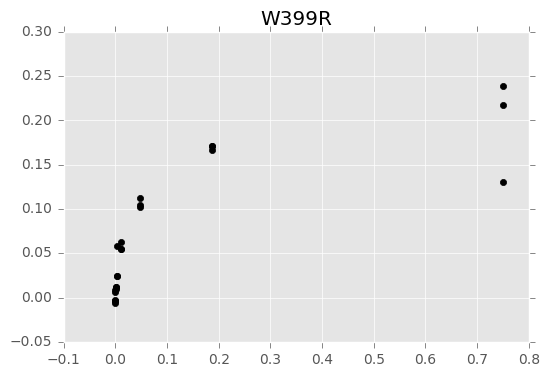

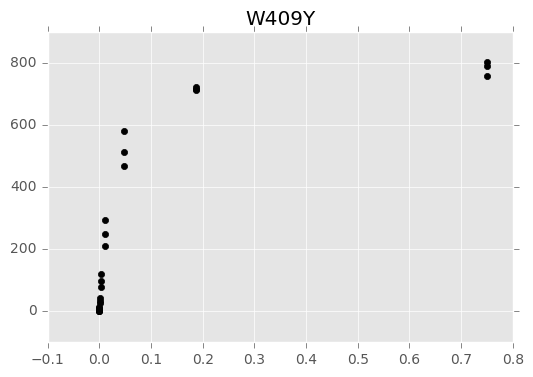

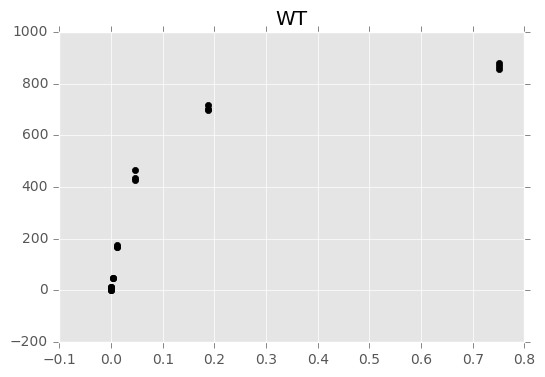

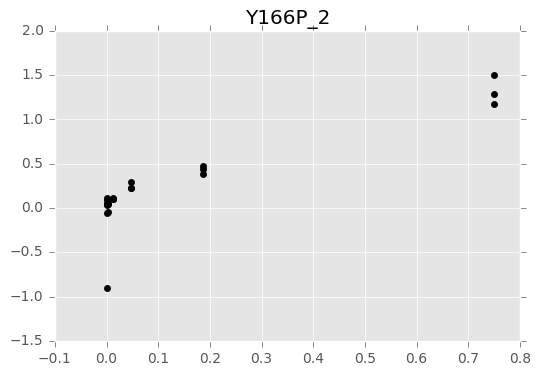

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt 
plt.style.use( 'ggplot' ) 

for idx, data in df.groupby( 'mutant' ):
    plt.scatter( data.s, data.kobs, color='k' )
    x_vals = np.linspace( data.s.min(), data.s.max(), 10 )
#    plt.plot( x_vals, v(  
    plt.title( idx ) 
    plt.show()

# Thermal stability 

In [25]:
# thermo 

df = pandas.read_csv( 'clean/thermal.csv' ) 
df = df[ ( df.rate > 0 ) ]

print( len( df.mutant.unique() ) ) 
print( df.columns ) 

133
Index(['Unnamed: 0', 'well', 'rate', 'mutant', 'temp'], dtype='object')


In [26]:
# logistic equation 
def f(x, x0, k): 
    return 1/(1+np.exp(-k*(x-x0)))

# what we will be determining 
my_index = ['tm', 'k', 'err_tm', 'err_k' ]

def my_thermal_fit( f, xdata, ydata, p0 ):
    try:
        params, cov = curve_fit( f, xdata, ydata, p0 )
        return params, cov 
    except:
        return np.zeros( len( p0 ) ).replace( [ 0 ], np.nan )

In [27]:
for idx, data in df.groupby( 'mutant' ):
    if len( data ) < 24:
        print( idx, 'ain\'t got no (<24)' )

A195S ain't got no (<24)
C167A ain't got no (<24)
C167Q ain't got no (<24)
D403A ain't got no (<24)
E154D ain't got no (<24)
E164A ain't got no (<24)
E164G ain't got no (<24)
E164R ain't got no (<24)
E177A ain't got no (<24)
E180K ain't got no (<24)
E222A ain't got no (<24)
E222H ain't got no (<24)
E222K ain't got no (<24)
E222Q ain't got no (<24)
E222R ain't got no (<24)
E222Y ain't got no (<24)
E22Y_2 ain't got no (<24)
E353A ain't got no (<24)
E406A ain't got no (<24)
E406D ain't got no (<24)
F415A ain't got no (<24)
F415N ain't got no (<24)
G355A ain't got no (<24)
H119A ain't got no (<24)
H122E ain't got no (<24)
H122N ain't got no (<24)
H178A ain't got no (<24)
H178R ain't got no (<24)
H315N ain't got no (<24)
H373R ain't got no (<24)
H379R ain't got no (<24)
H379T ain't got no (<24)
I244E ain't got no (<24)
I247N ain't got no (<24)
I303N ain't got no (<24)
I91E ain't got no (<24)
L171A ain't got no (<24)
L174R ain't got no (<24)
M221A ain't got no (<24)
M221A_2 ain't got no (<24

In [30]:
my_mutants = []
for idx, data in df.groupby( 'mutant' ):
    mutation = idx.split( '_' )[ 0 ] 
    normalized_rates = data.rate / data.rate.max()
    #params, cov = my_curve_fit( v, data.temp, normalized_rates, ( 39.9, -.1 ) )
    #my_mutants.append( ( mutation, params, cov ) ) 

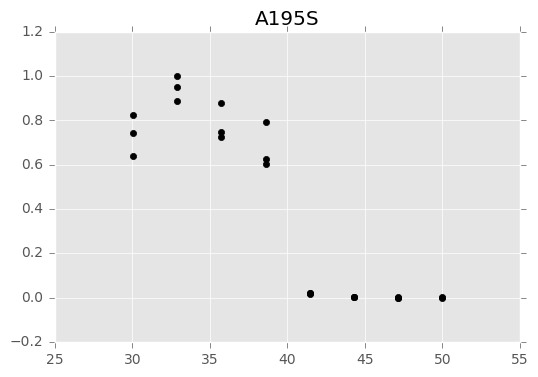

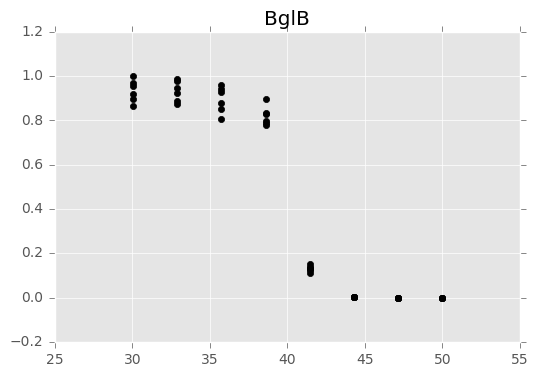

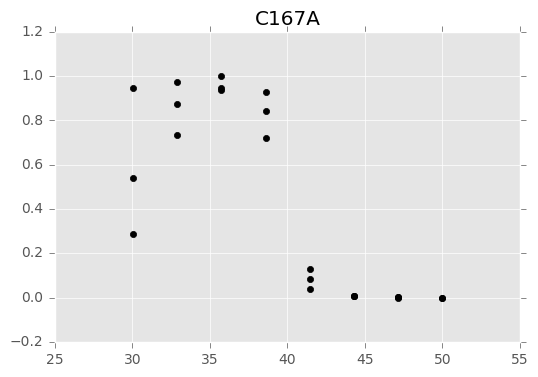

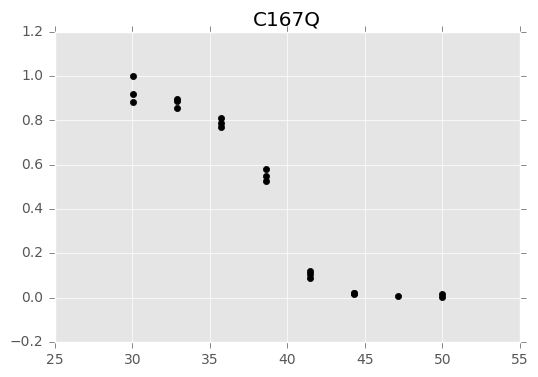

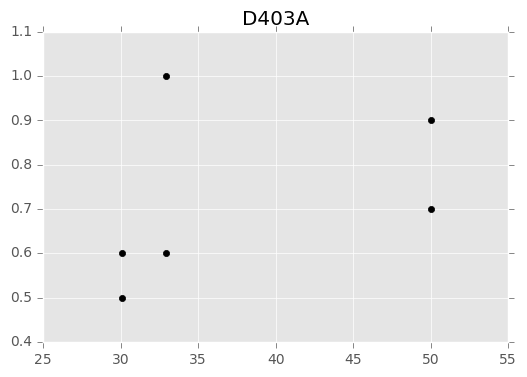

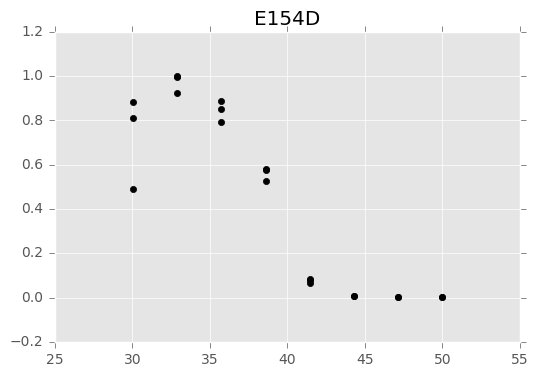

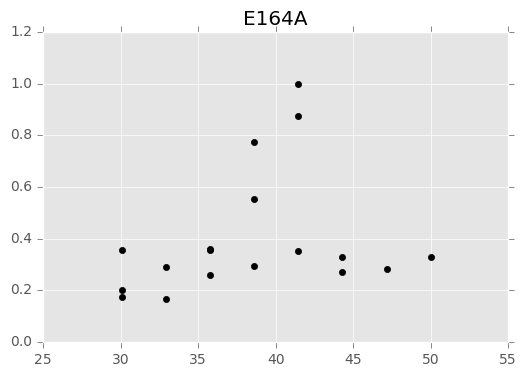

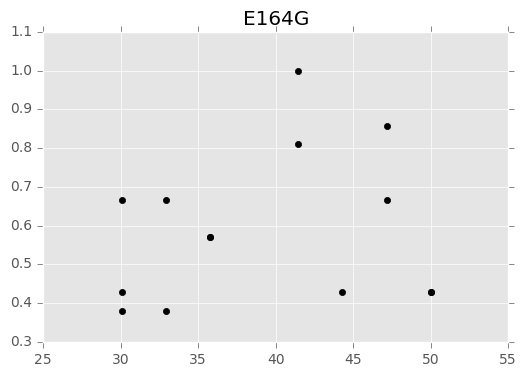

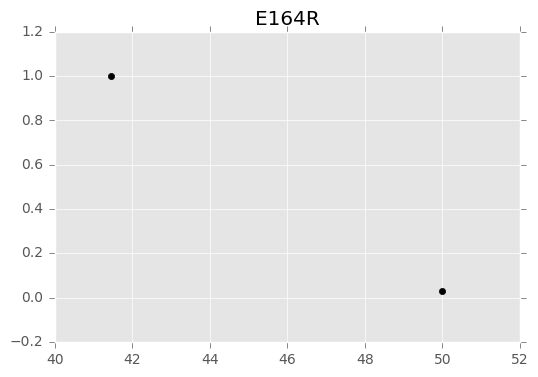

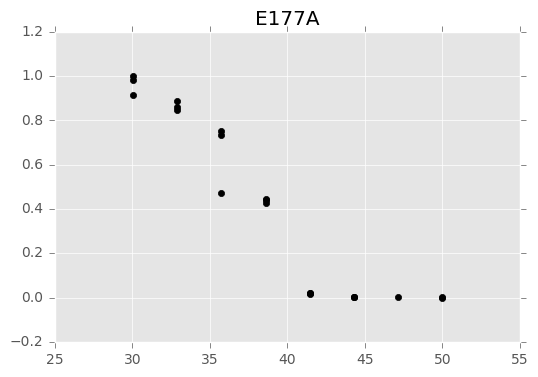

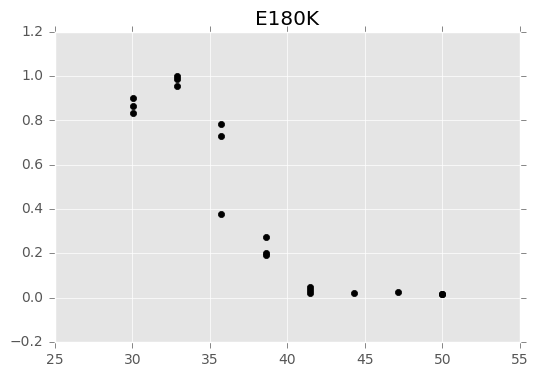

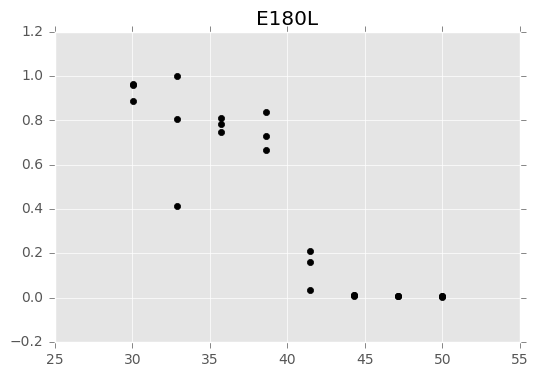

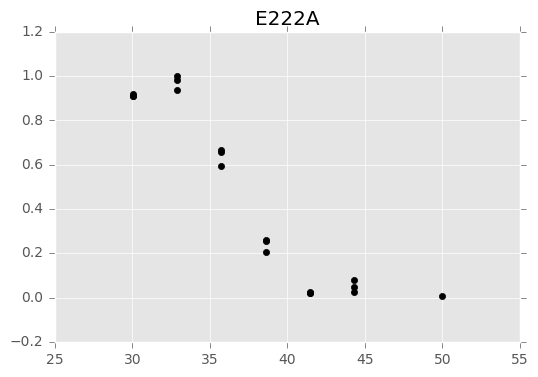

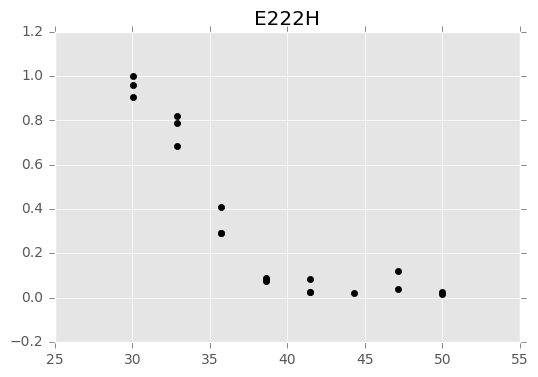

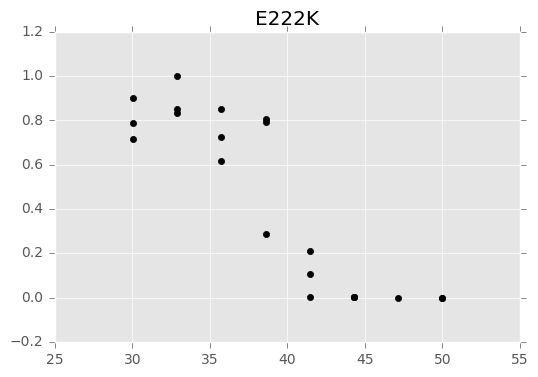

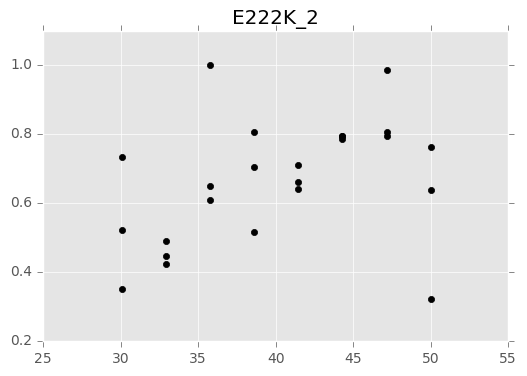

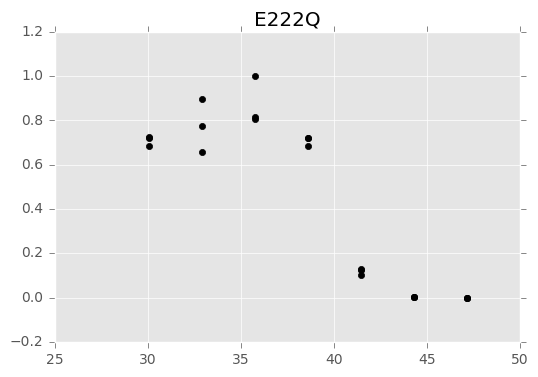

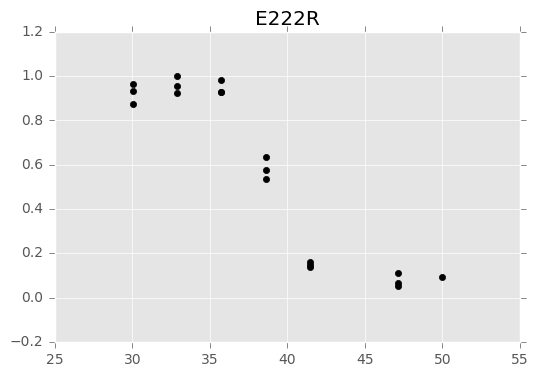

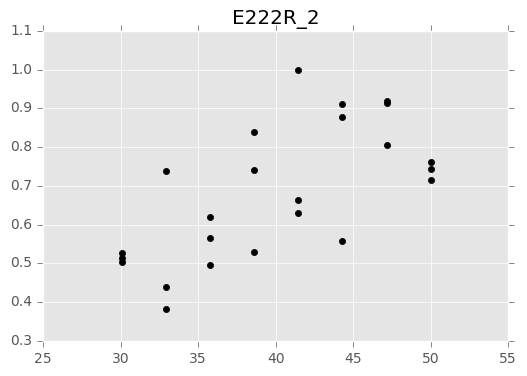

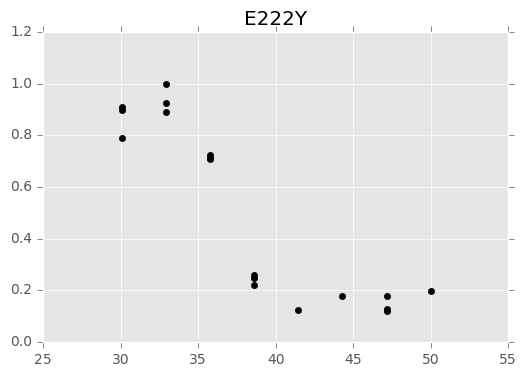

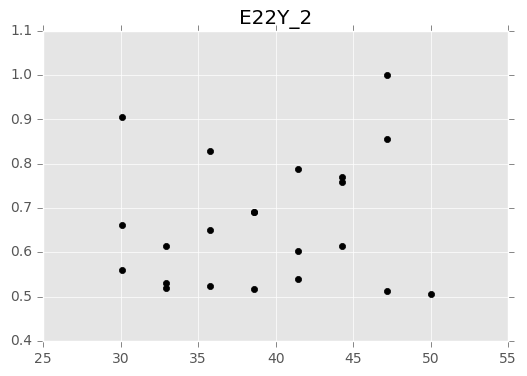

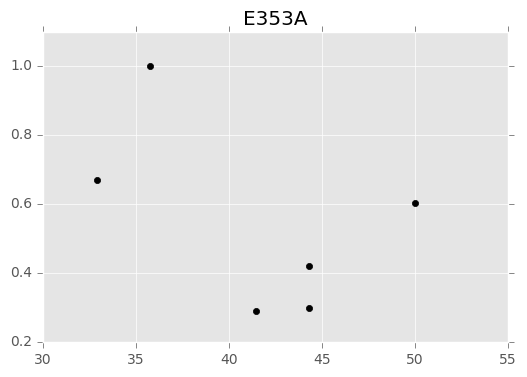

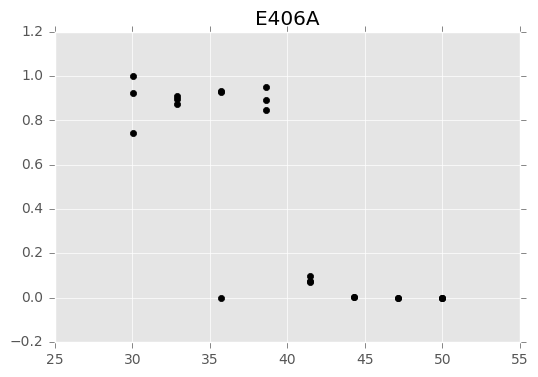

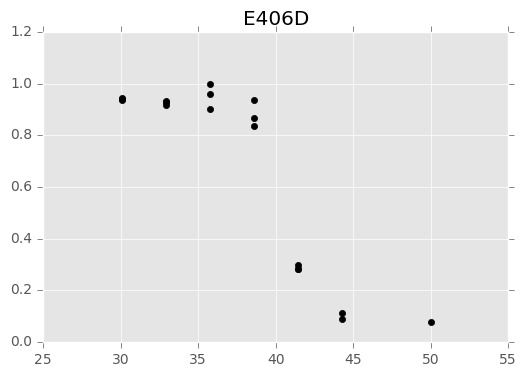

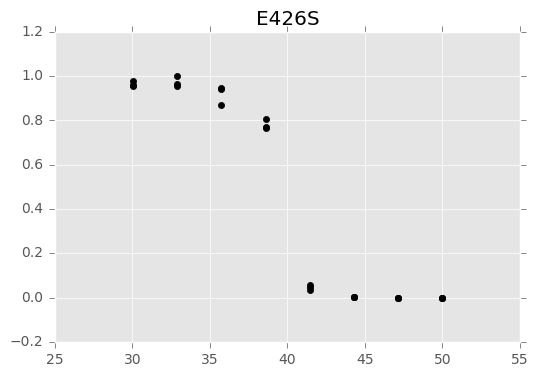

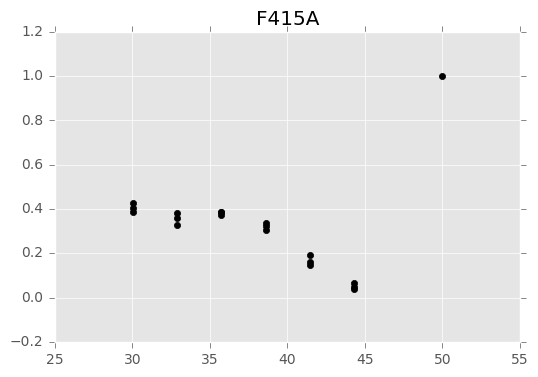

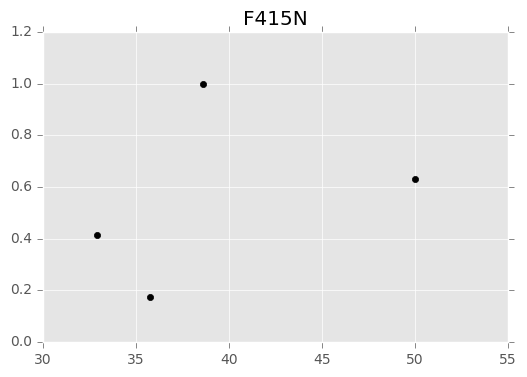

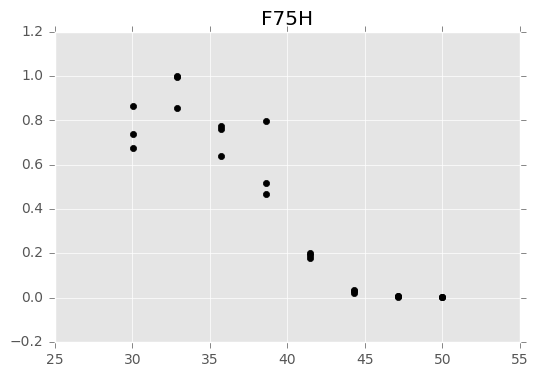

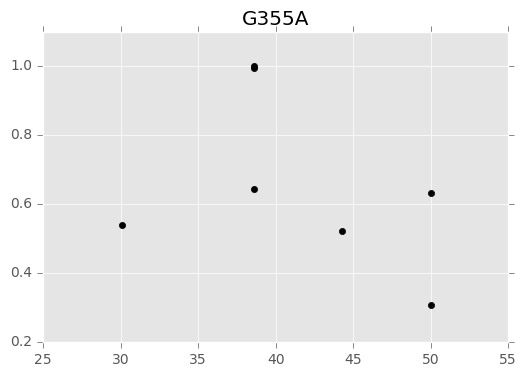

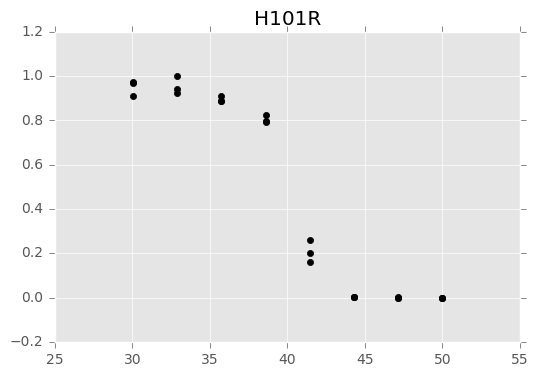

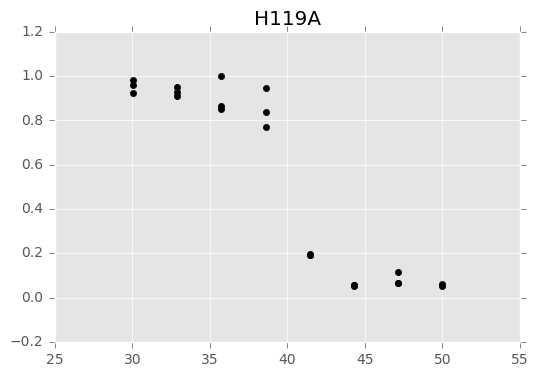

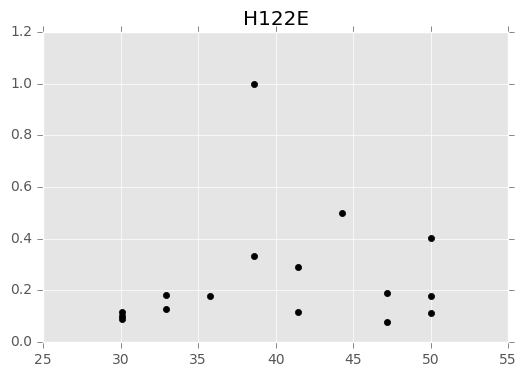

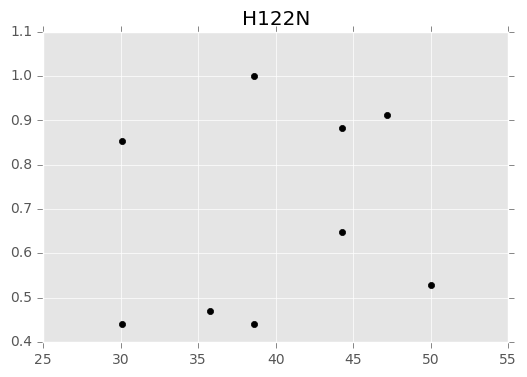

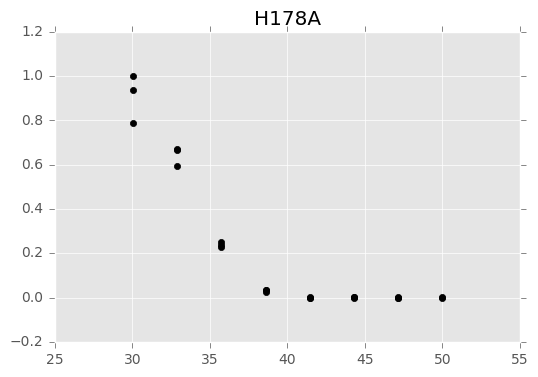

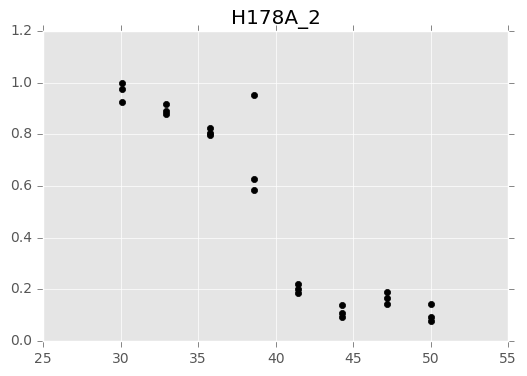

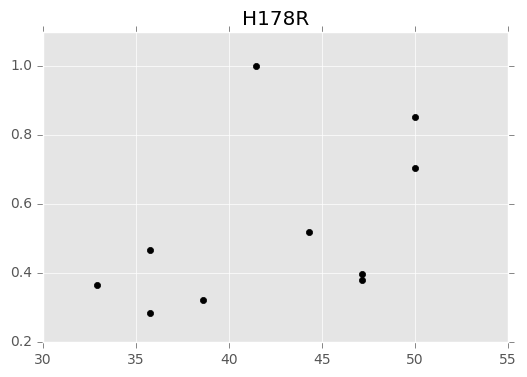

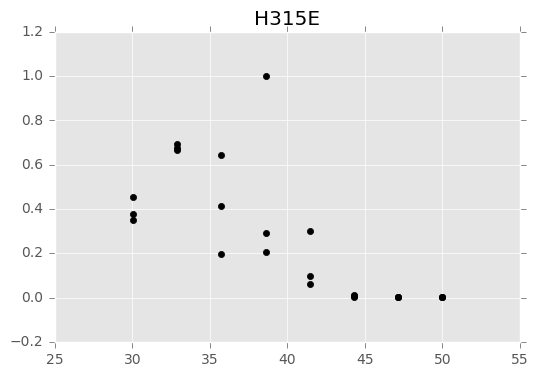

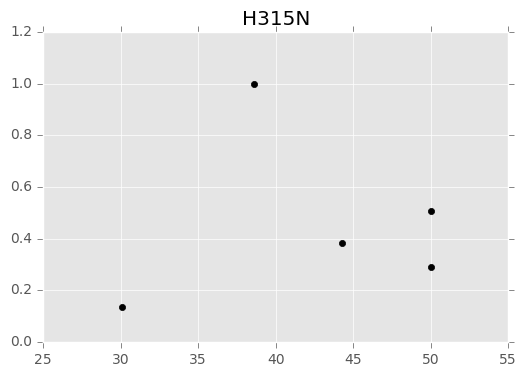

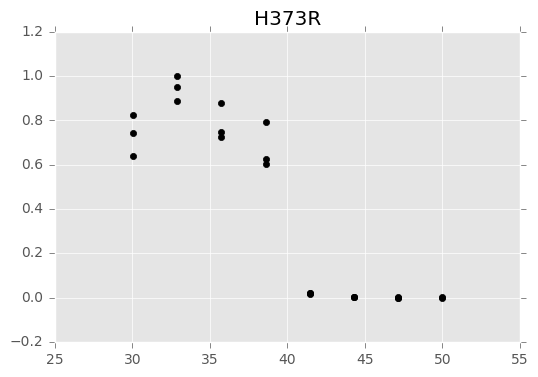

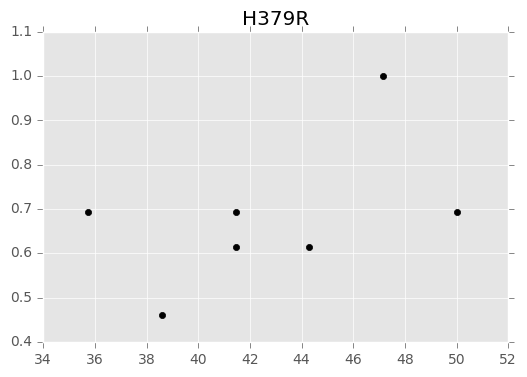

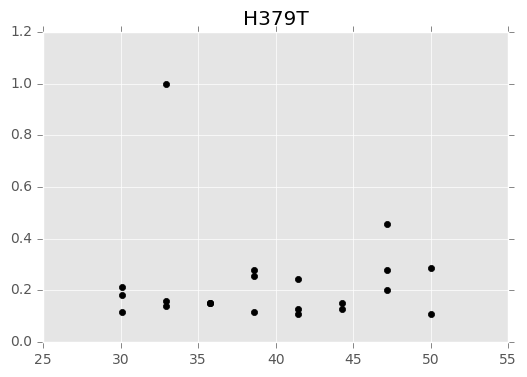

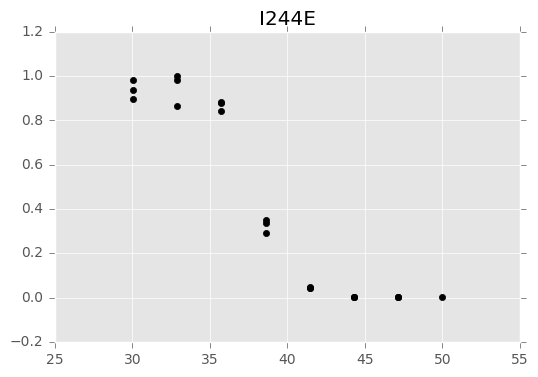

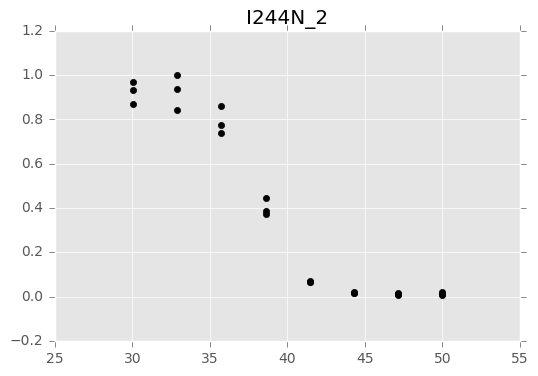

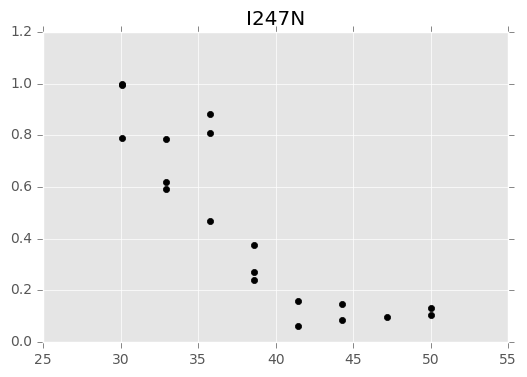

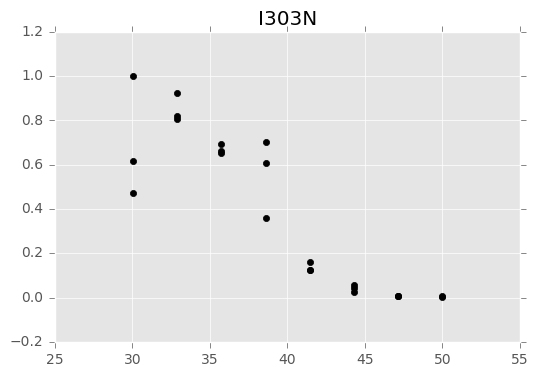

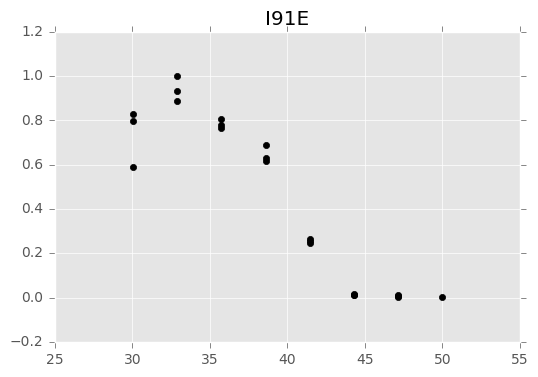

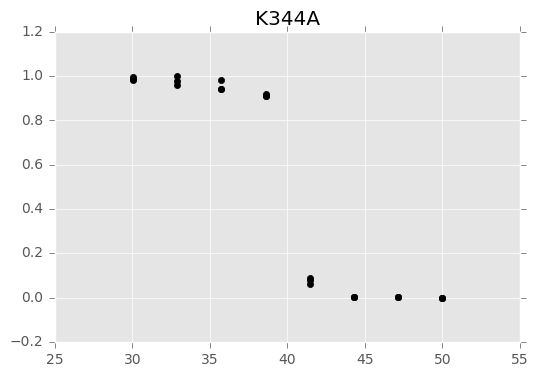

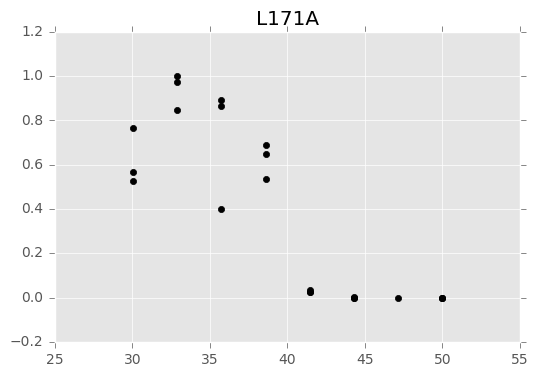

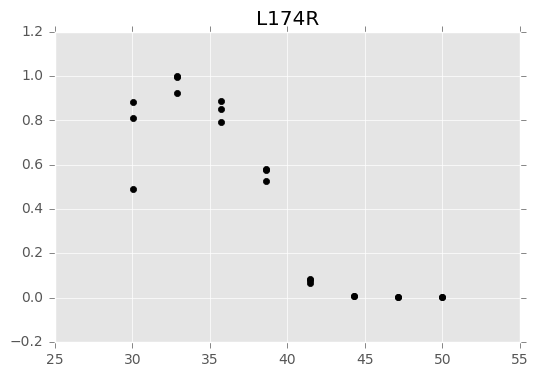

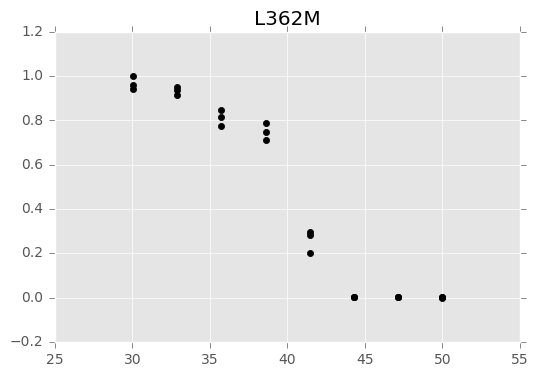

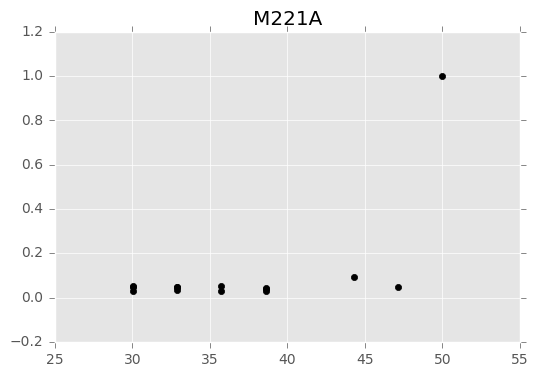

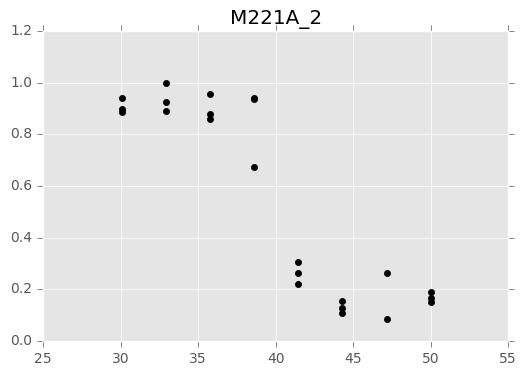

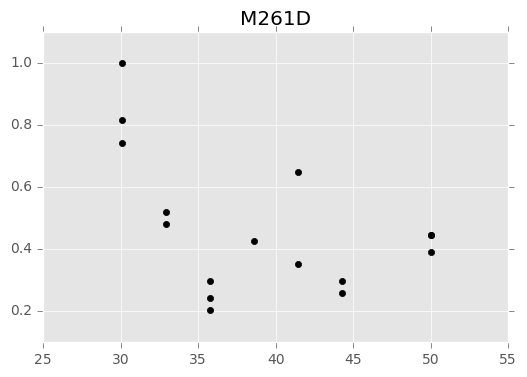

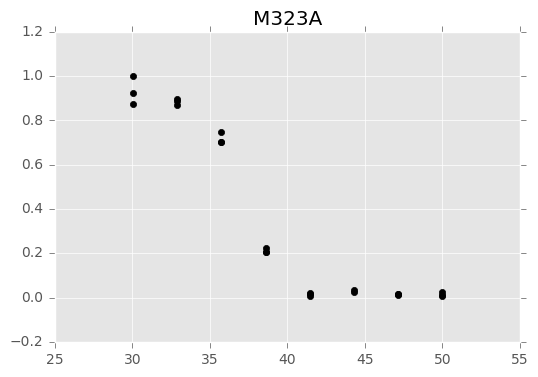

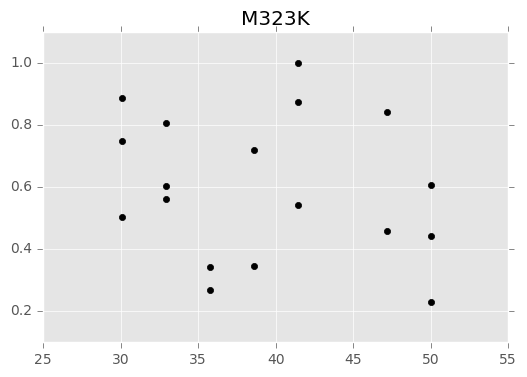

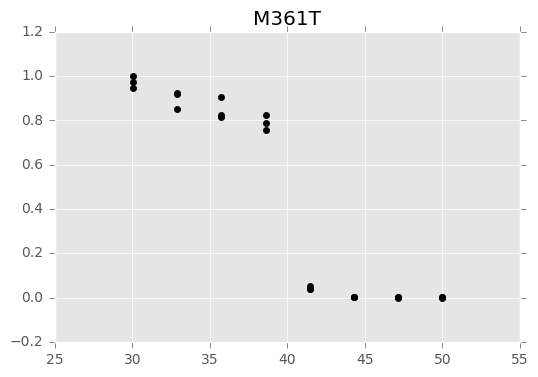

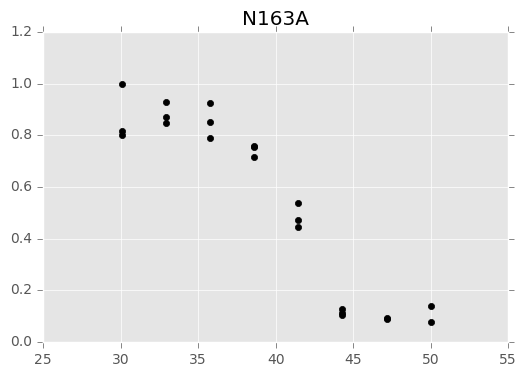

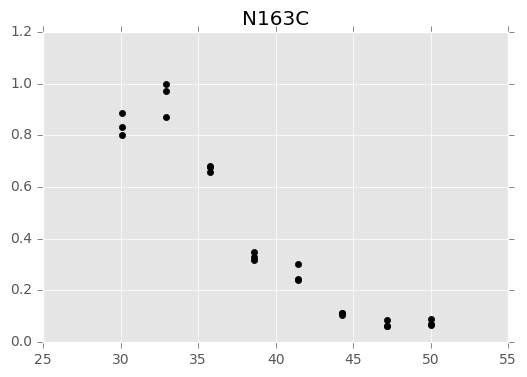

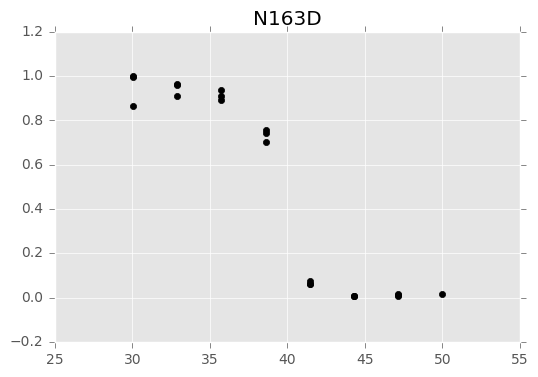

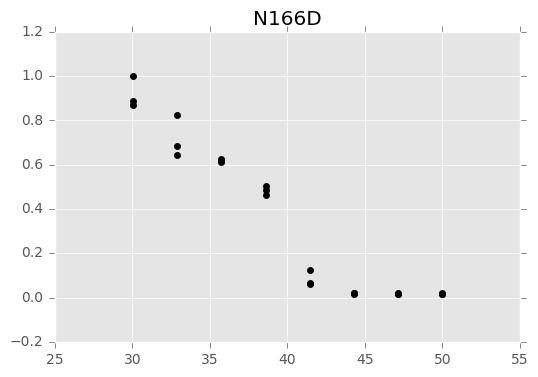

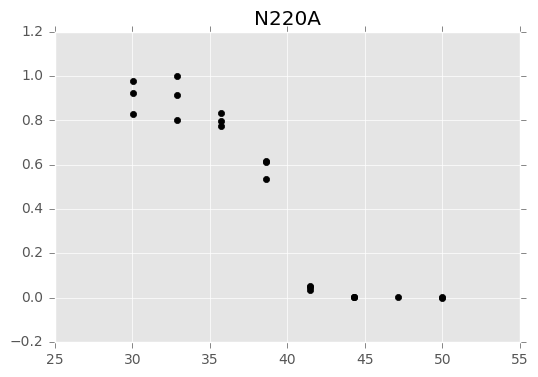

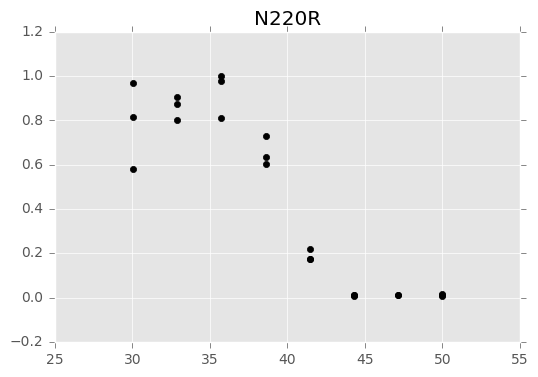

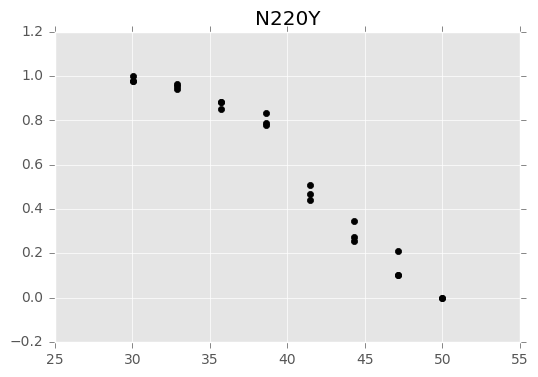

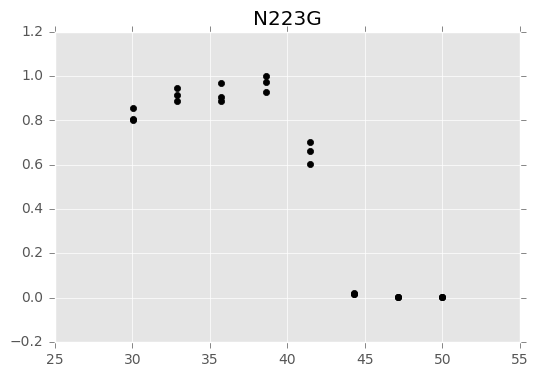

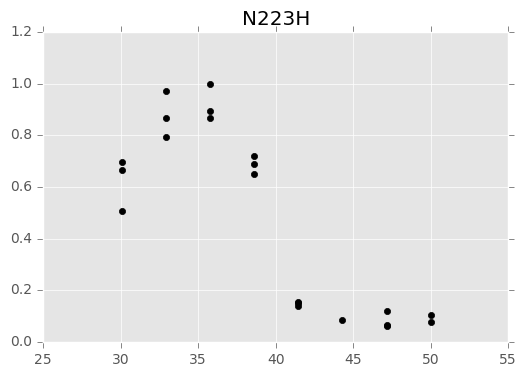

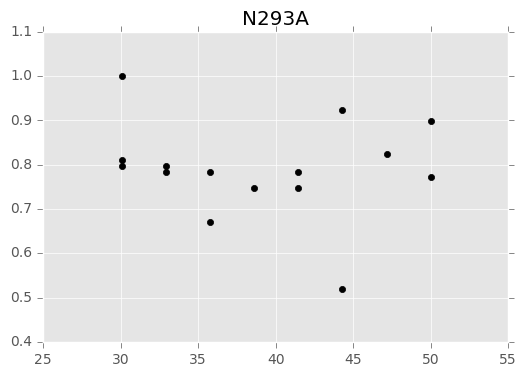

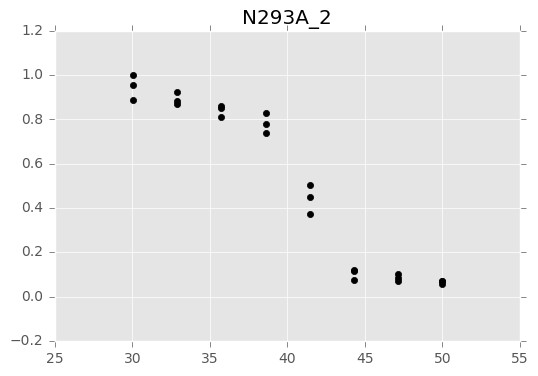

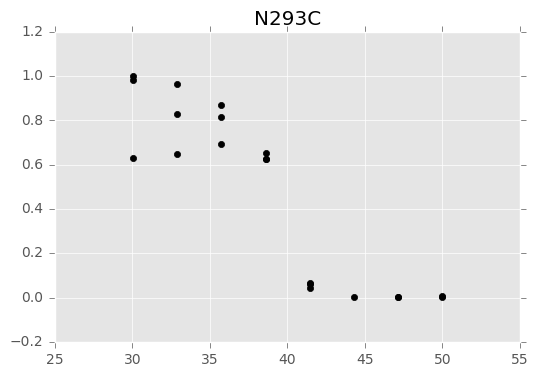

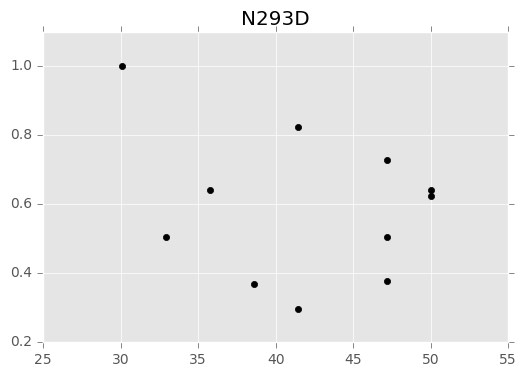

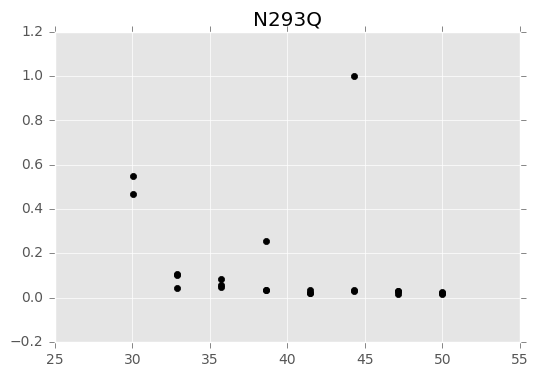

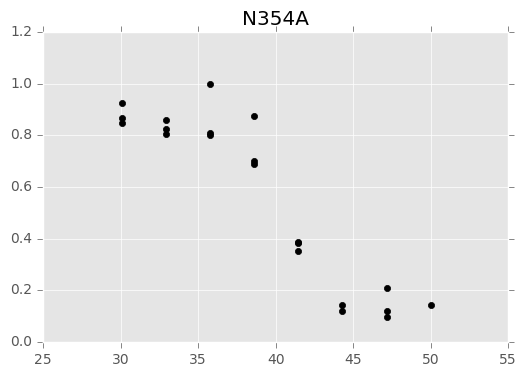

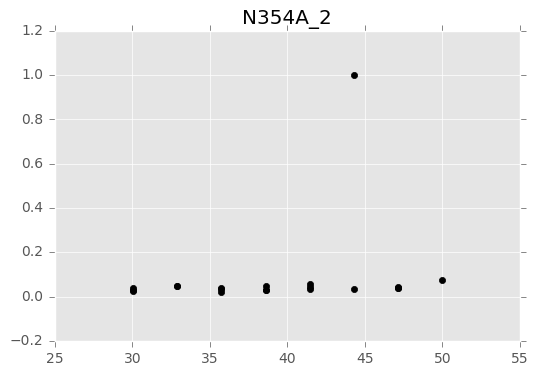

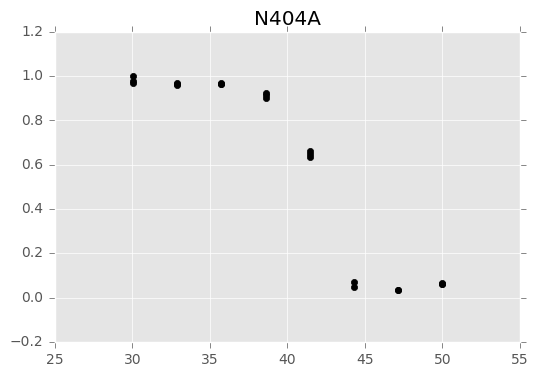

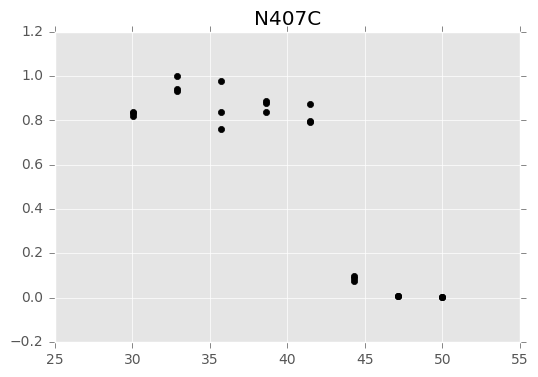

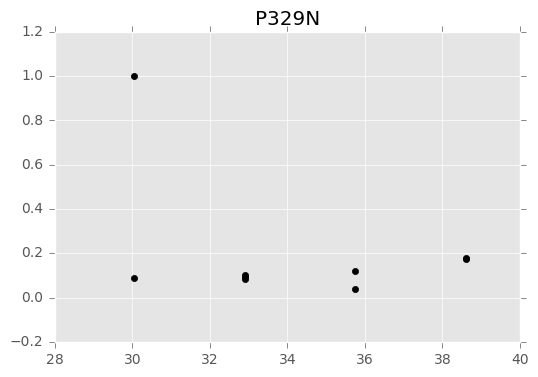

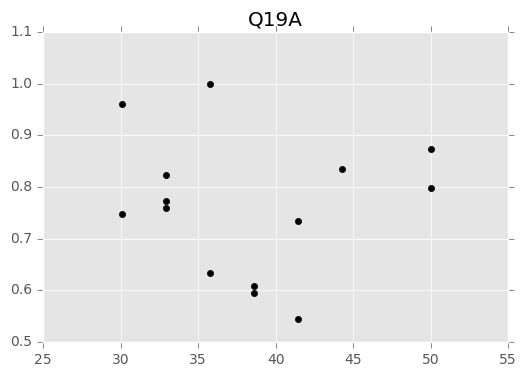

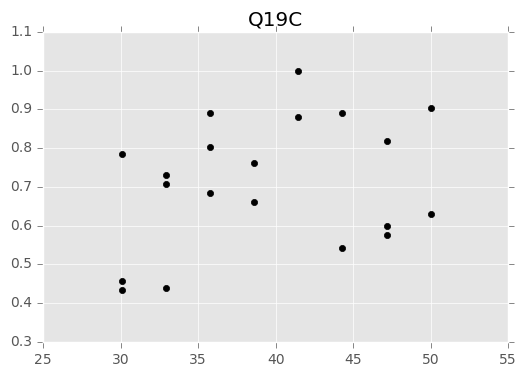

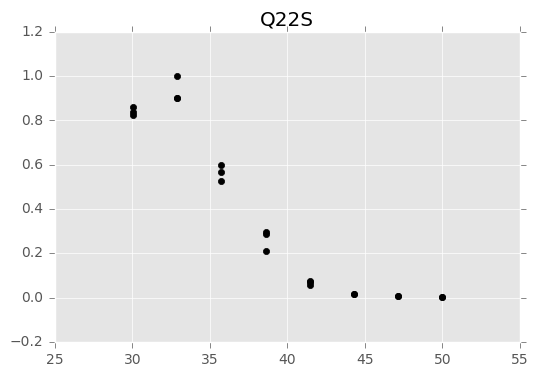

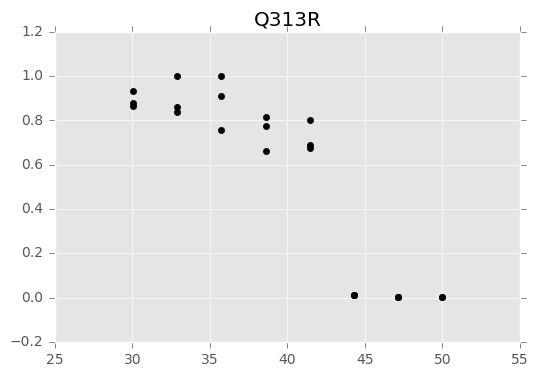

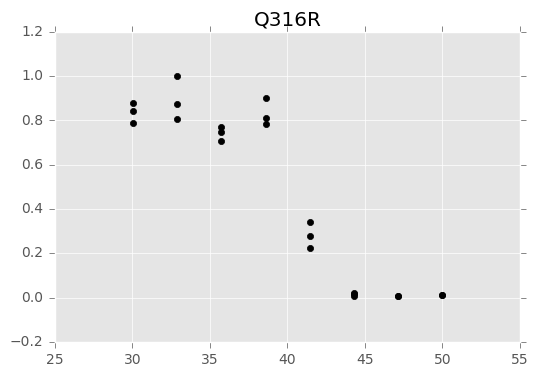

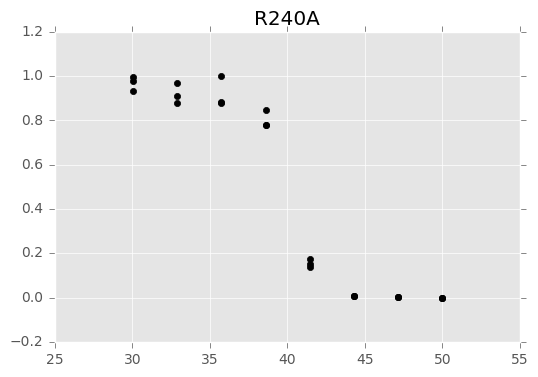

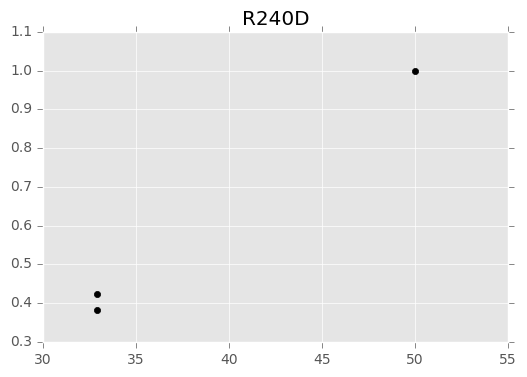

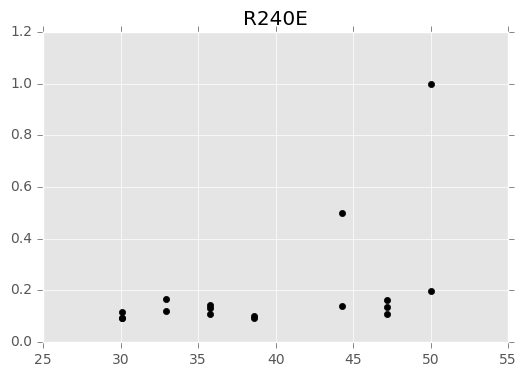

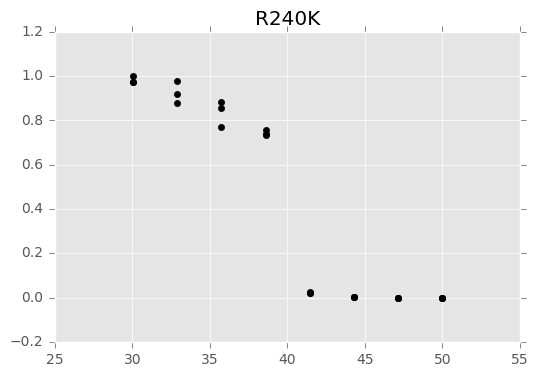

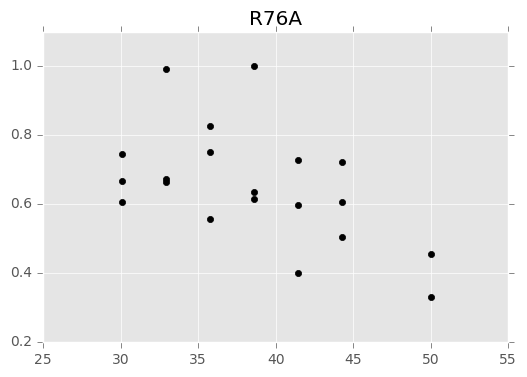

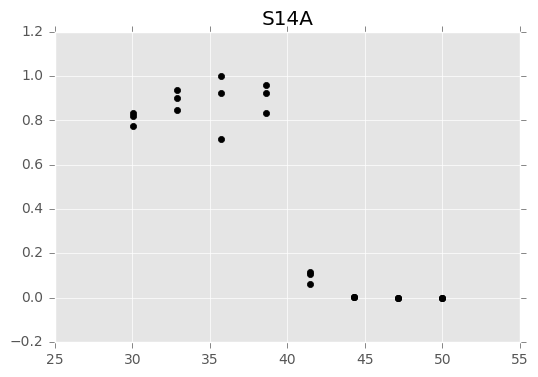

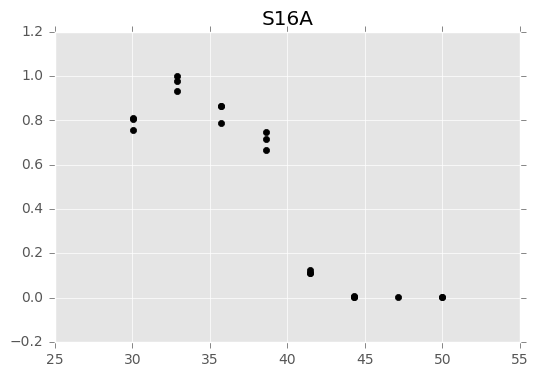

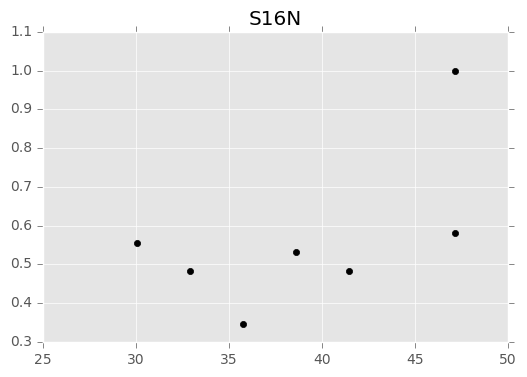

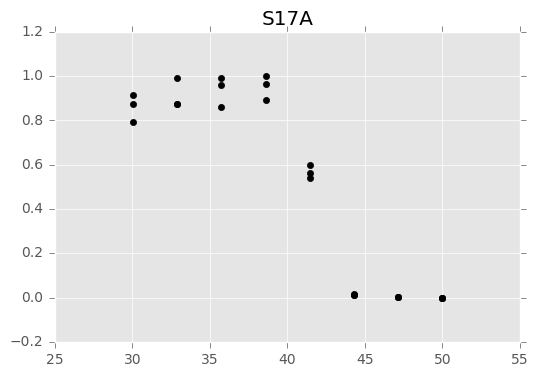

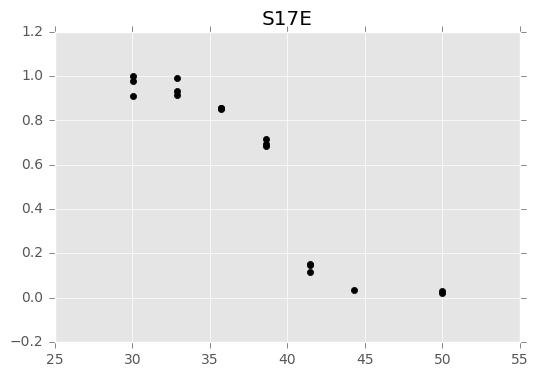

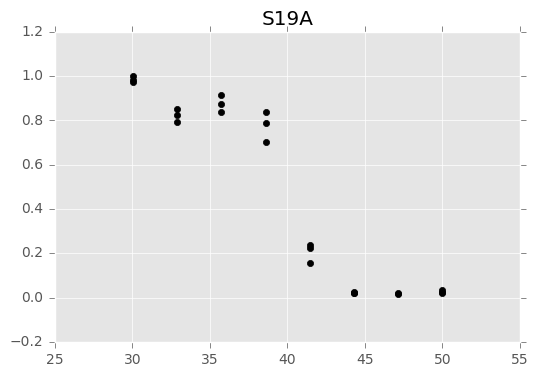

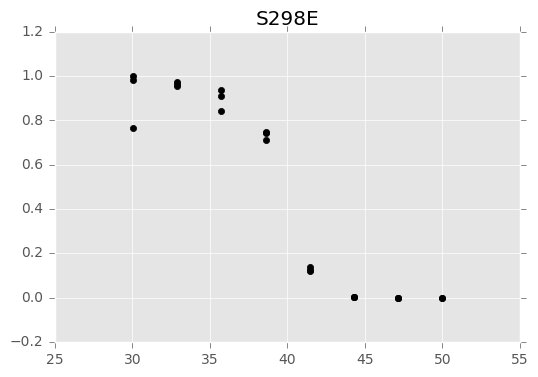

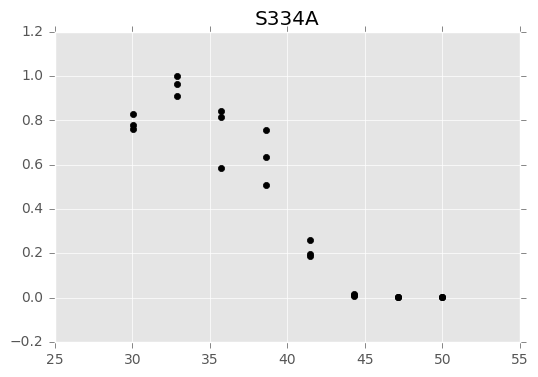

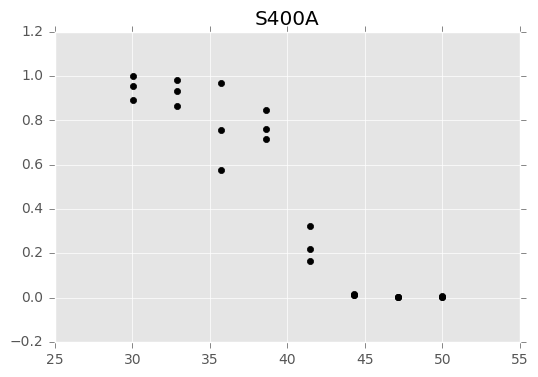

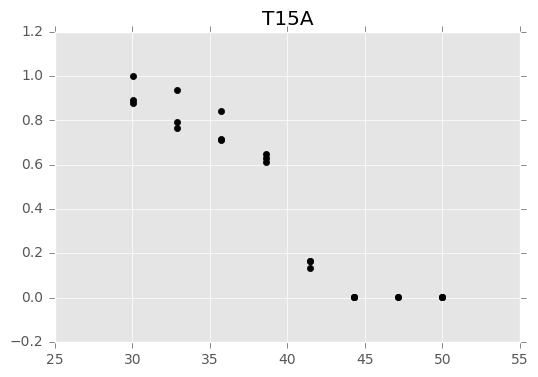

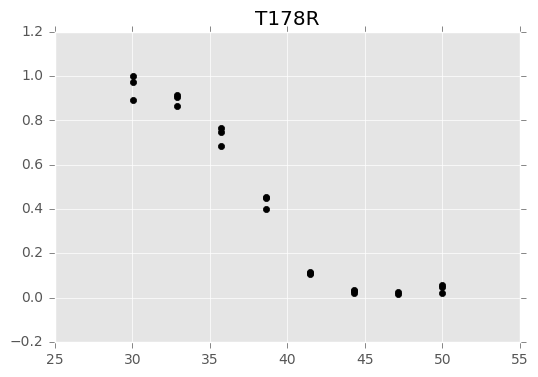

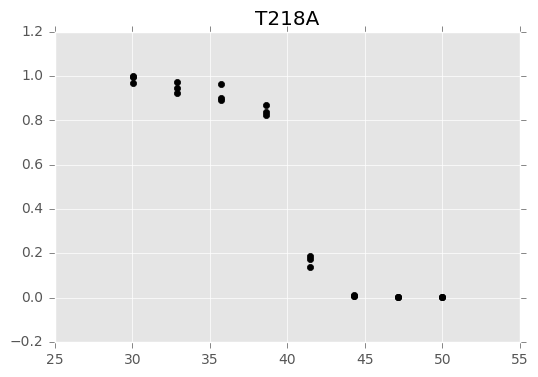

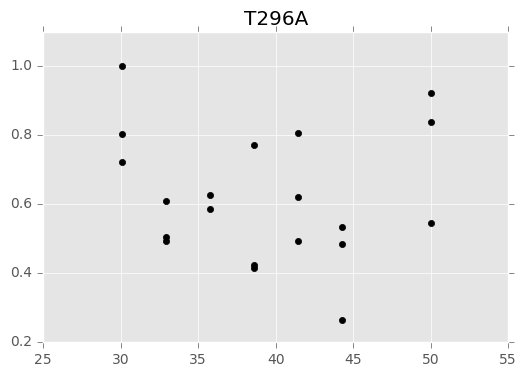

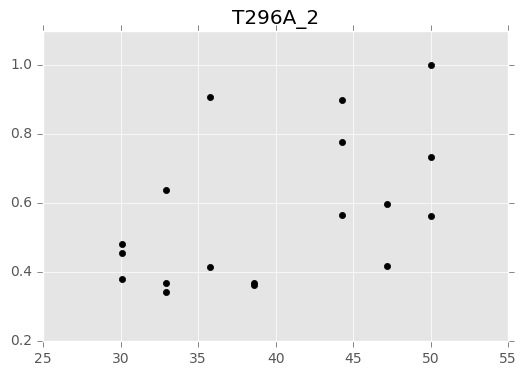

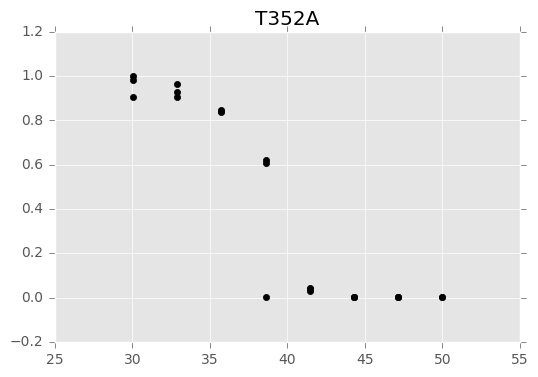

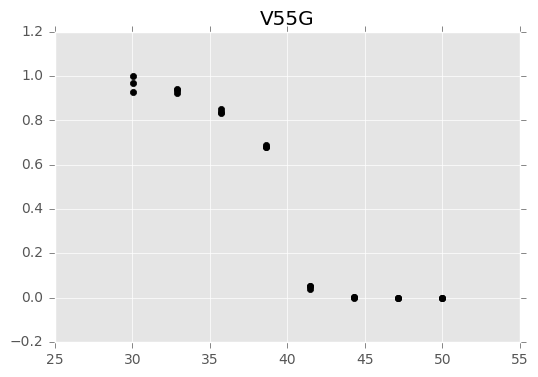

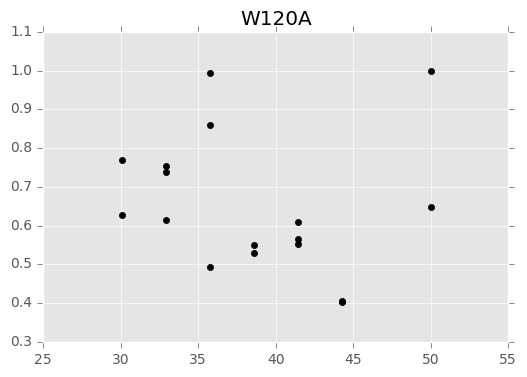

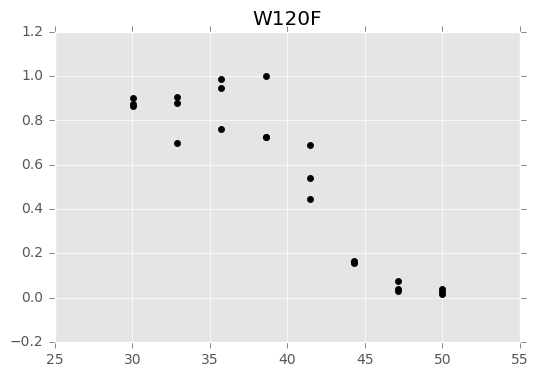

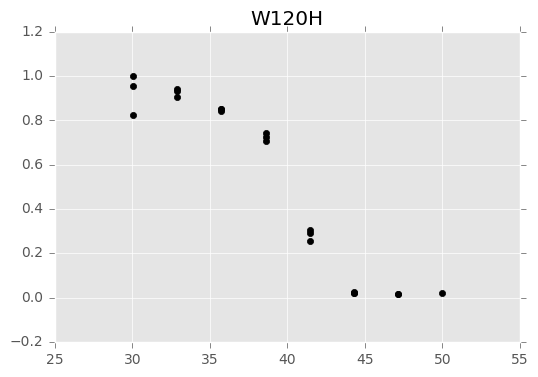

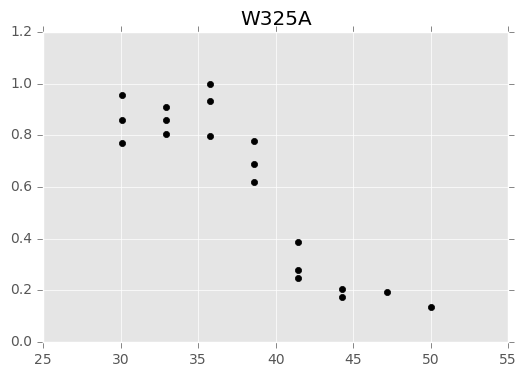

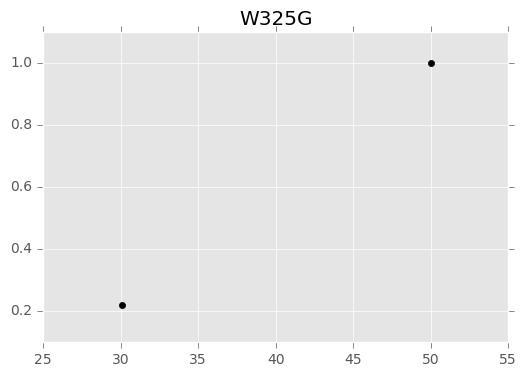

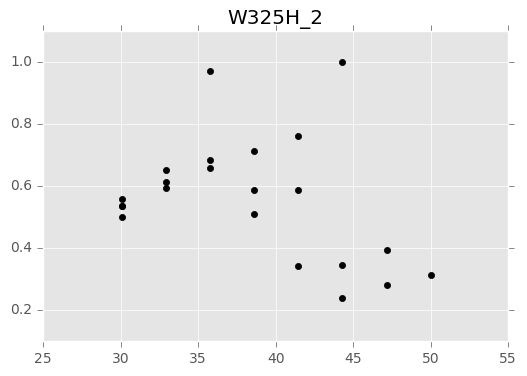

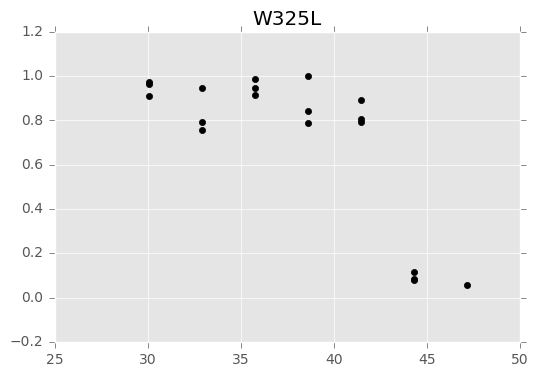

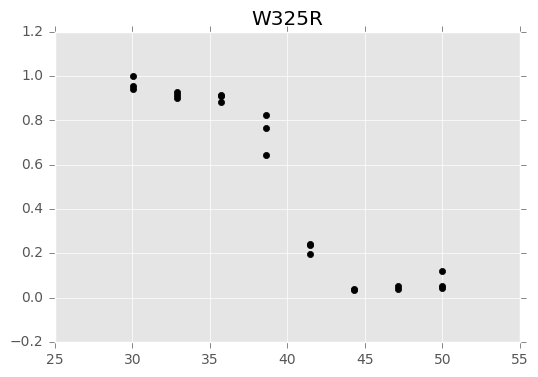

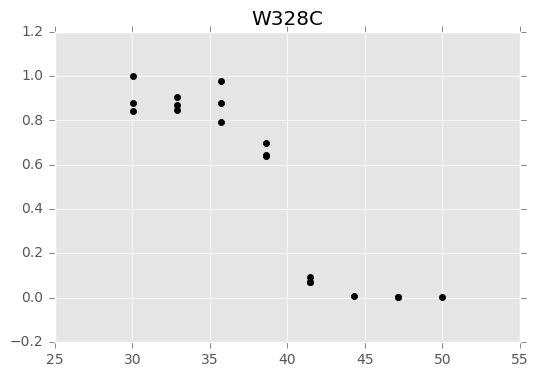

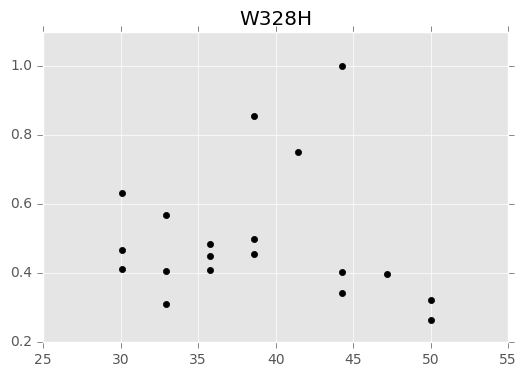

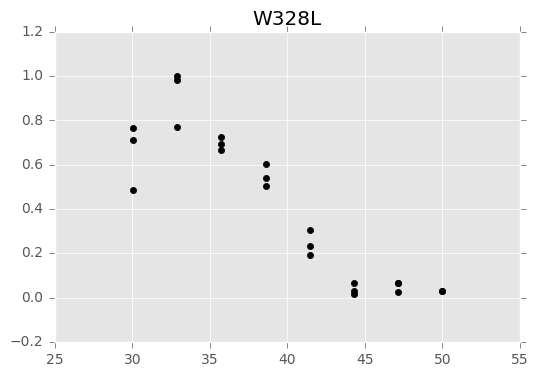

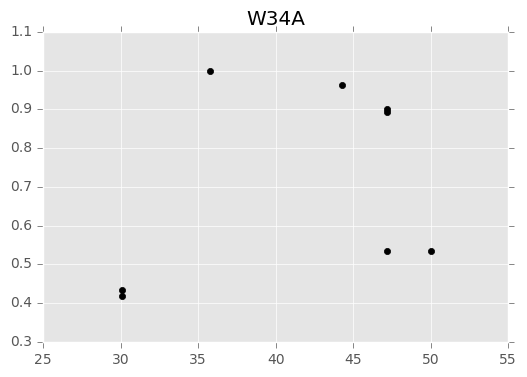

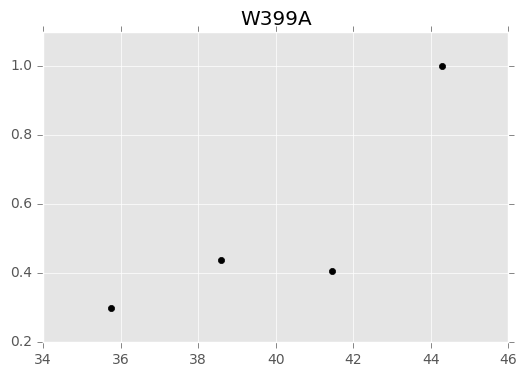

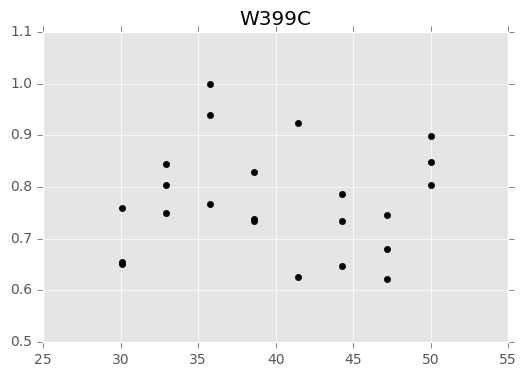

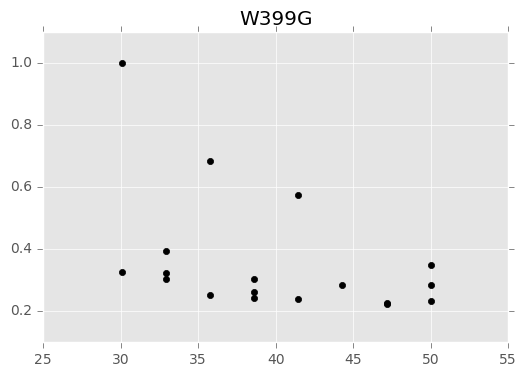

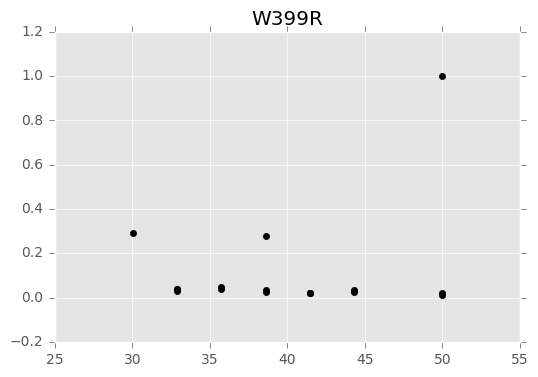

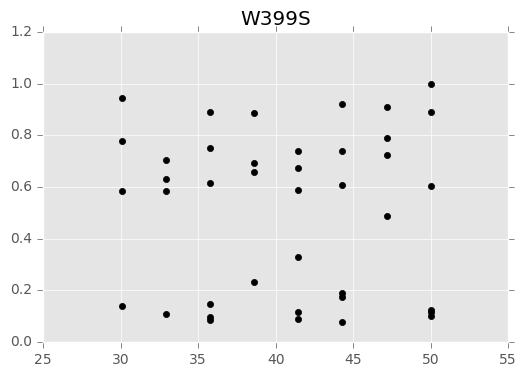

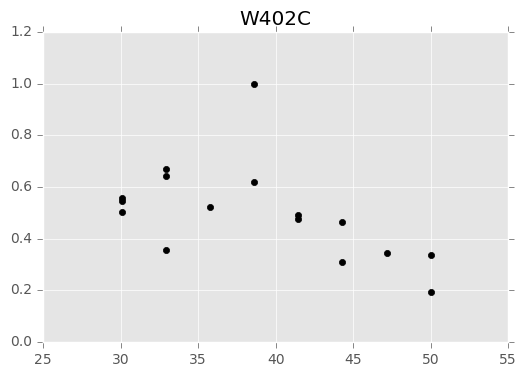

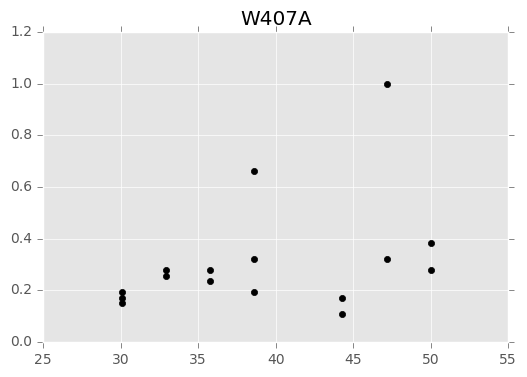

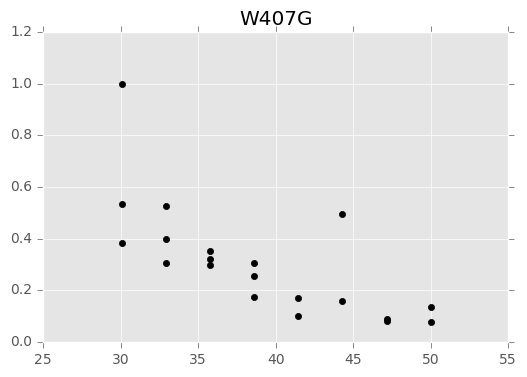

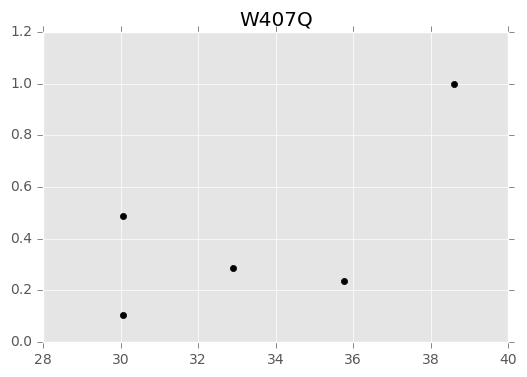

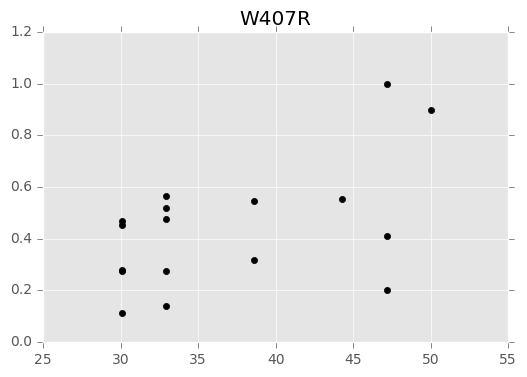

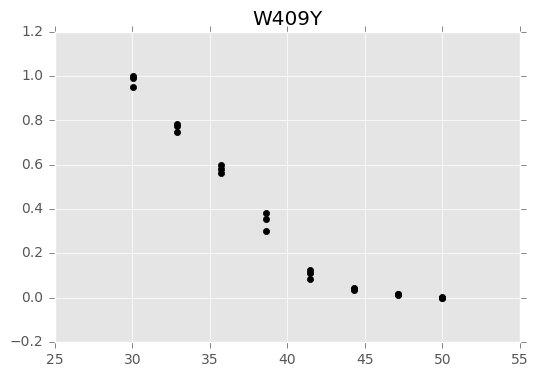

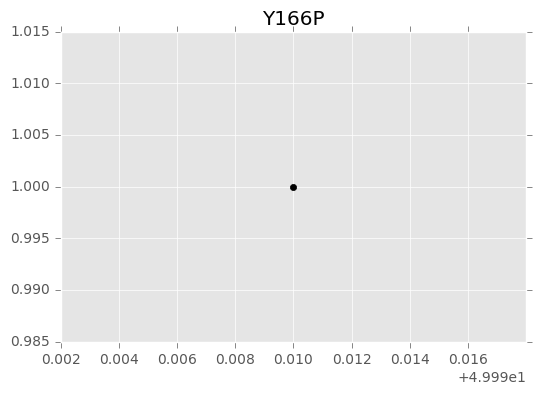

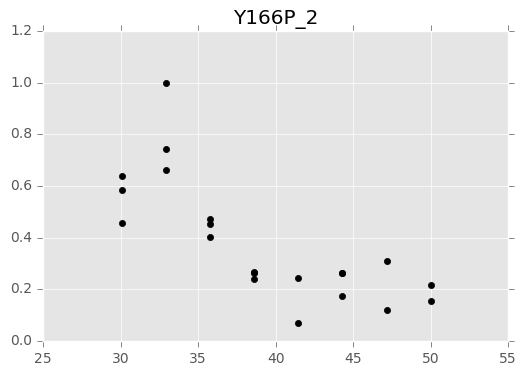

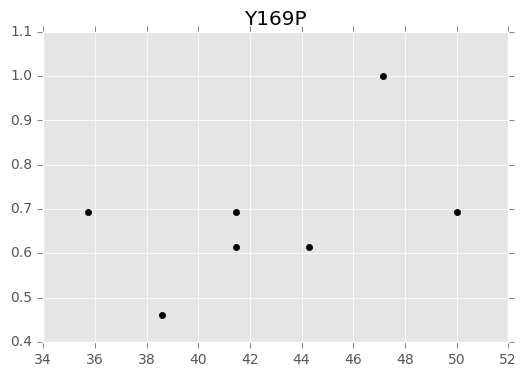

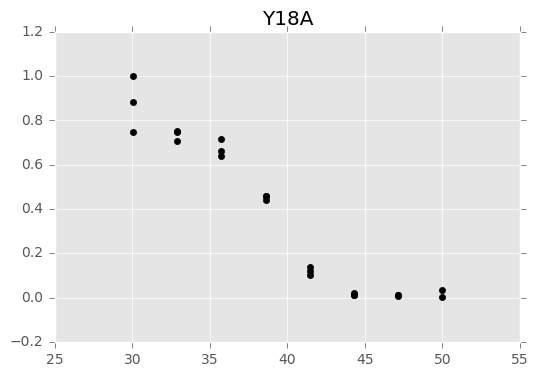

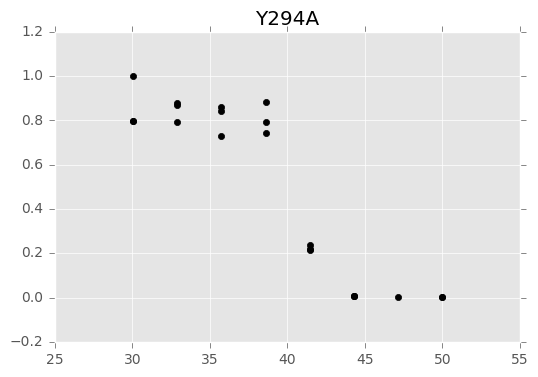

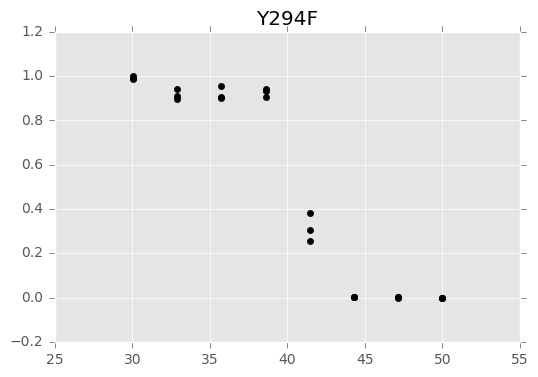

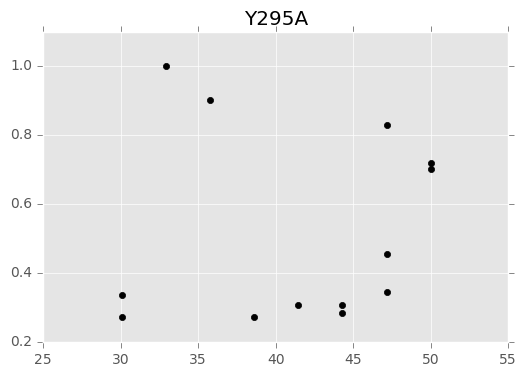

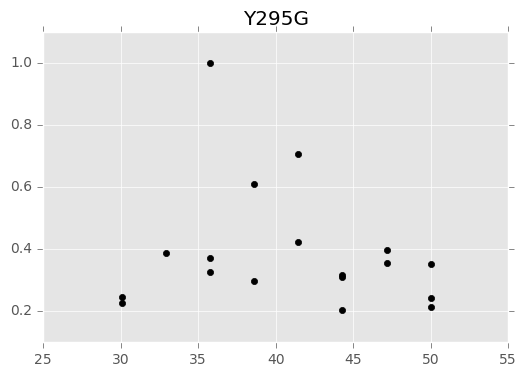

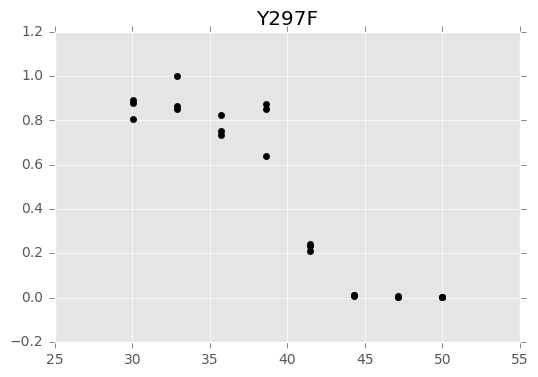

In [31]:
for idx, data in df.groupby( 'mutant' ):
    normalized_rates = data.rate / data.rate.max()
    plt.scatter( data.temp, normalized_rates, color='k' )
    x_vals = np.linspace( data.temp.min(), data.temp.max(), 10 )
#    plt.plot( x_vals, v(  
    plt.title( idx ) 
    plt.show()